# AML Project 1 - Regression

Problem Statement : The objective of the project is to build predictive model to analyze and predict the productivity performance of the employees in the garment factory

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
#numpy, scipy, pandas, seaborn and sklearn package versions used throughout the project1
print('numpy:', np.__version__)
print('seaborn:', sns.__version__)
print('pandas:', pd.__version__)
print('sklearn:', sklearn.__version__)

numpy: 1.19.5
seaborn: 0.11.2
pandas: 1.3.4
sklearn: 0.24.2


# Data Exploration

In [3]:
df_reg = pd.read_csv("garments_worker_productivity.csv")

In [4]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Feature data types breakdown :
       
    Float features : 6
    Integer features : 5
    String features : 4 

In [5]:
df_reg.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


# Missing Values

In [6]:
df_reg.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

# Exploratory Data Analysis

In [7]:
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(12, 6))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

Text(0.5, 1.0, 'Work in Progress Histogram')

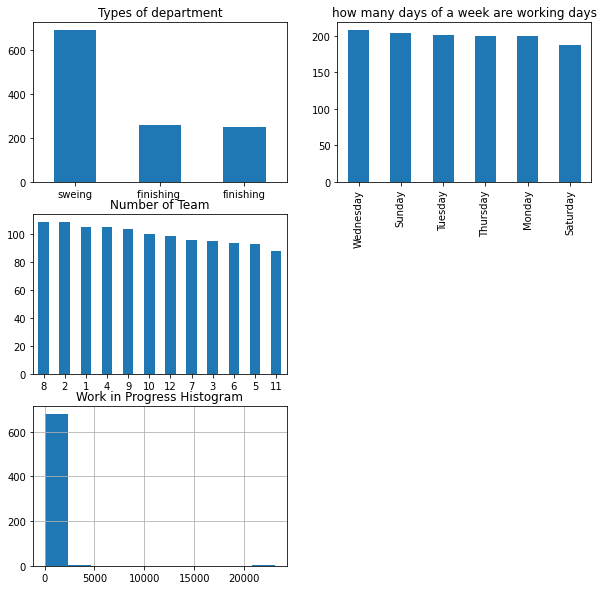

In [8]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot department count
plt.subplot2grid(fig_dims, (0, 0))
df_reg['department'].value_counts().plot(kind='bar', 
                                         title='Types of department')
plt.xticks(rotation=0)

# Plot day of the week count
plt.subplot2grid(fig_dims, (0, 1))
df_reg['day'].value_counts().plot(kind='bar', 
                                       title='how many days of a week are working days')
#plt.xticks(rotation=0)

# Plot team count
plt.subplot2grid(fig_dims, (1, 0))
df_reg['team'].value_counts().plot(kind='bar', 
                                    title='Number of Team')
plt.xticks(rotation=0)


# Plot standard minute value histogram
plt.subplot2grid(fig_dims, (2, 0))
df_reg['smv'].hist()
plt.title('standard minute value Histogram')

# Plot Actual Productivity histogram
plt.subplot2grid(fig_dims, (2, 0))
df_reg['actual_productivity'].hist()
plt.title('Actual Productivity Histogram')


# Plot wip histogram
plt.subplot2grid(fig_dims, (2, 0))
df_reg['wip'].hist()
plt.title('Work in Progress Histogram')

# Feature 1 : 'date' [Date in MM-DD-YYYY]

In [9]:
df_reg['date'].unique()

array(['1/1/2015', '1/3/2015', '1/4/2015', '1/5/2015', '1/6/2015',
       '1/7/2015', '1/8/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/7/2015', '2/8/2015', '2/9/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/1/2015',
       '3/2/2015', '3/3/2015', '3/4/2015', '3/5/2015', '3/7/2015',
       '3/8/2015', '3/9/2015', '3/10/2015', '3/11/2015'], dtype=object)

# Feature 2 : 'day' [Day of the Week]

In [10]:
df_reg['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday')])

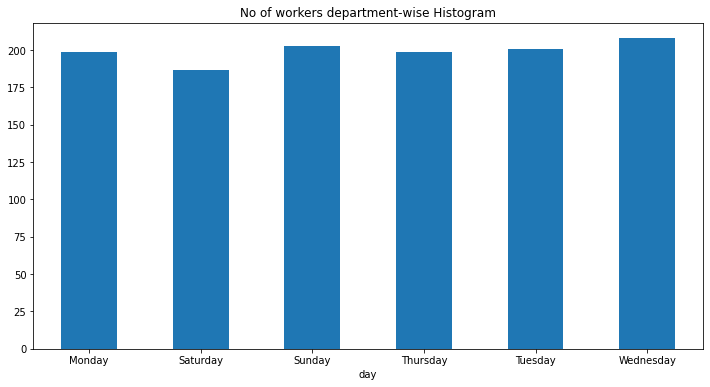

In [11]:
df_reg.groupby('day').count()['no_of_workers'].plot(kind = 'bar',  
                                                         title = 'No of workers department-wise Histogram')
plt.xticks(rotation=0)

# Feature 3 : 'quarter' 

The feature 'quarter' represents a portion of the month. A month was divided into four quarters

In [12]:
df_reg['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

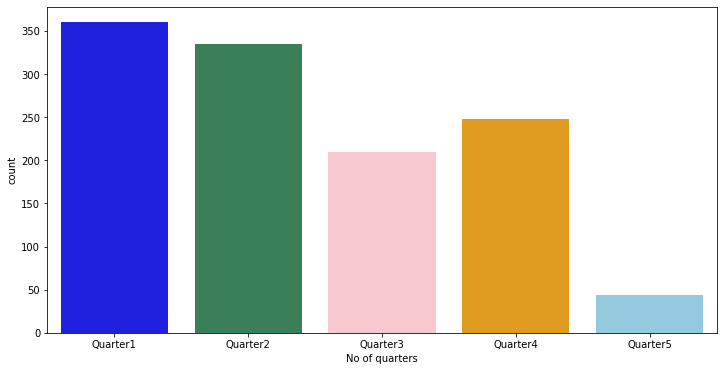

In [13]:
quarter_count = sns.countplot(x = 'quarter', data = df_reg, palette=["blue", "seagreen", "pink","orange", "skyblue"])
plt.xlabel('No of quarters')
plt.show()

# Feature 4 : 'department' [Associated department with the instance]

The feature 'department' represents an associated department with the instance.

In [14]:
df_reg['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [15]:
# Spelling correction : 'sweing' to 'sewing'
df_reg['department']=df_reg['department'].replace(['sweing'],['sewing'])

(array([0, 1, 2]),
 [Text(0, 0, 'finishing'), Text(1, 0, 'finishing '), Text(2, 0, 'sewing')])

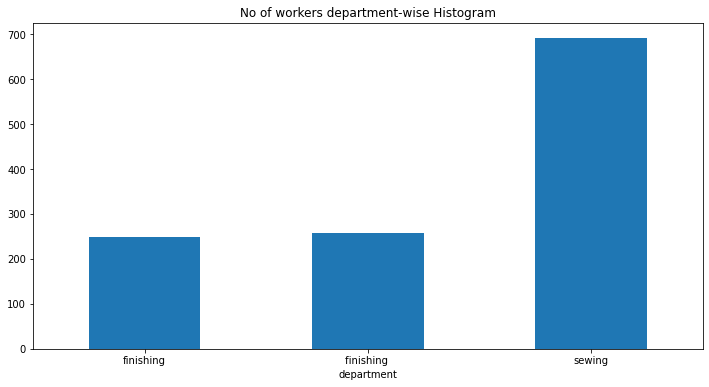

In [16]:
df_reg.groupby('department').count()['no_of_workers'].plot(kind = 'bar',  
                                                         title = 'No of workers department-wise Histogram')
plt.xticks(rotation=0)

There are 3 department namely 'sewing', 'finishing' and 'finishing ', we will use 'finishing ' for our null value
handling and finally prepare 2 distinct groups of 'sewing', 'finishing' later on...


# Feature 5 : 'team' 

The feature 'teamno' represents an associated team number with the instance.

In [17]:
df_reg['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

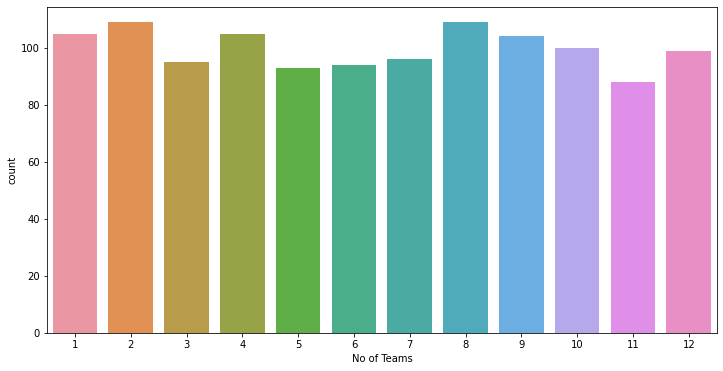

In [18]:
team_count = sns.countplot(x = 'team', data = df_reg)
plt.xlabel('No of Teams')
plt.show()

# Feature 6 : 'no_of_workers' 

The feature 'no_of_workers' represents the Number of workers in each team.

<AxesSubplot:>

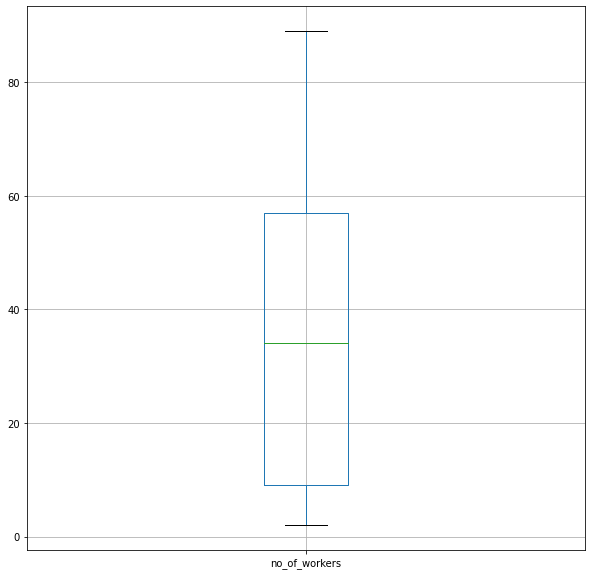

In [19]:
df_reg.boxplot(column=['no_of_workers'],figsize=(10,10))

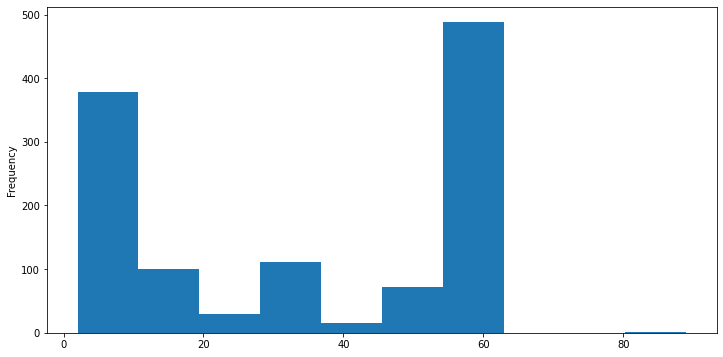

In [20]:
df_reg['no_of_workers'].plot(kind='hist')
plt.show()

# Feature 7 : 'no_of_stylechange' 

The feature 'no_of_stylechange' represents the Number of changes in the style of a particular product.

In [21]:
df_reg['no_of_style_change'].unique()

array([0, 1, 2])

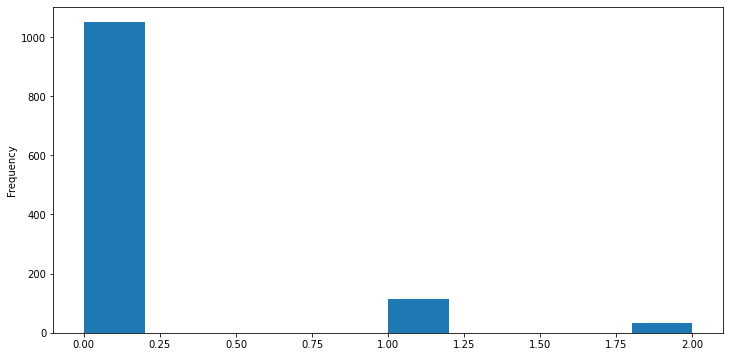

In [22]:
df_reg['no_of_style_change'].plot(kind='hist')
plt.show()

# Feature 8 : 'targeted_productivity' 

The feature 'targeted_productivity'represents argeted productivity set by the Authority for each team for each day.

<AxesSubplot:>

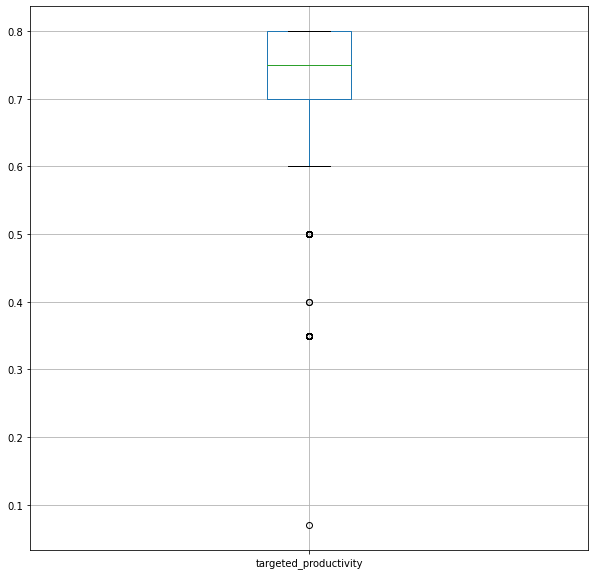

In [23]:
df_reg.boxplot(column=['targeted_productivity'],figsize=(10,10))

Observaion : Targeted productivity tends to inflate more beyond 70%

# Feature 9 : 'smv' 

The feature 'smv' represents Standard Minute Value, it is the allocated time for a task.

<AxesSubplot:>

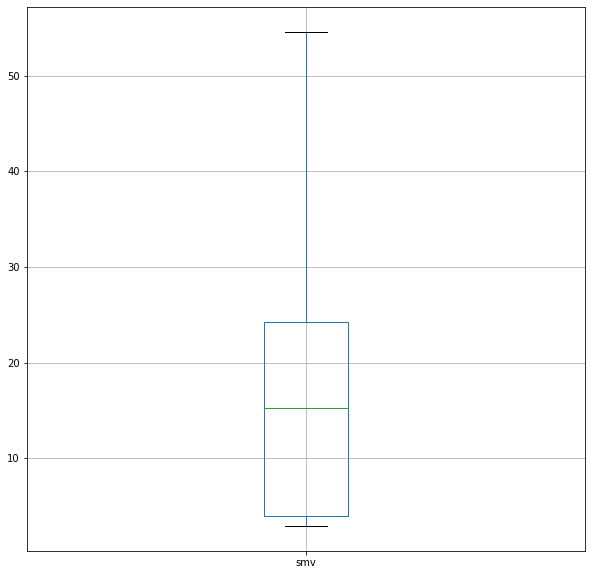

In [24]:
df_reg.boxplot(column=['smv'],figsize=(10,10))

Observation : Overall average allocated time for a single task is more than 15 minutes

# Feature 10 : 'wip' 

The feature 'wip'  as Work in progress. Includes the number of unfinished items for products.

<AxesSubplot:>

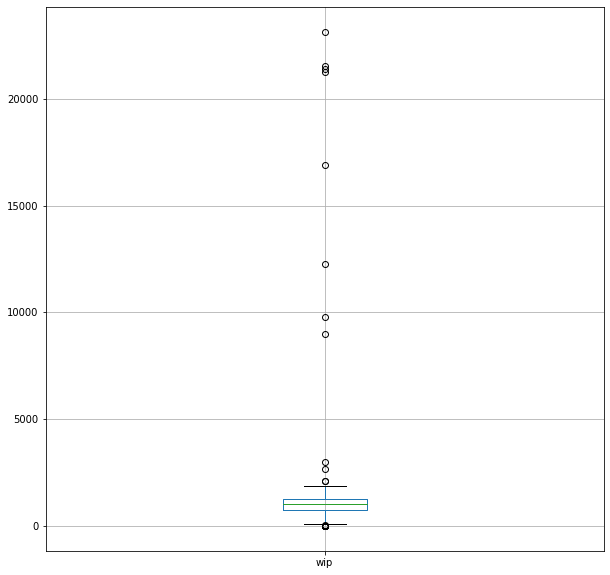

In [25]:
df_reg.boxplot(column=['wip'],figsize=(10,10))

Observation : Average number of unfinished products per day is aruond 1100 and there is a number of outliers for wip in dataset which are beyond 2500

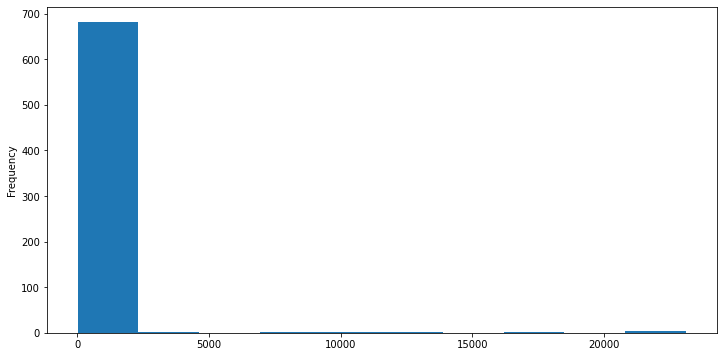

In [26]:
df_reg['wip'].plot(kind='hist')
plt.show()

# Feature 11 : 'overtime' 

The feature 'overtime' represents the amount of overtime by each team in minutes.

In [27]:
df_reg['over_time'].unique()

array([ 7080,   960,  3660,  1920,  6720,  6900,  6000,  6480,  2160,
        7200,  1440,  6600,  5640,  1560,  6300,  6540, 13800,  6975,
        7020,  6780,  4260,  6660,  4320,  6960,  2400,  3840,  4800,
        4440,  1800,  2700, 10620, 10350,  9900,  5310, 10170,  4470,
       10530, 10440,  5490,  5670,  9720, 12600, 10050, 15120, 14640,
         900, 25920, 10260,  2760,  4710,  9540,  7680,  3600,  6420,
        7980,  3240,  8220,  6930,  8460,  7350,  5400,  1620,  1980,
        2970,  7320,  5100,  3390,  1260,  3420,  8970,  4950, 10080,
        9810,  6570,  5040,  4380,  3630,  8280,  6120,  5580,  3720,
        5760,  7470, 10500,  6360,  4140,  8400, 12180,  9000, 15000,
       10770, 12000,  9360,  3060,  2520,   720,  3780, 10320,   360,
        6840,  1080,  1200,  4080,   240,  5880,  6240,  4200,  3960,
         600,  2280,  5940,  1320,  5460,  2040,  4020,  3000,  3360,
        5820,  6060,  2640,  7500,  2880,   120,  3300,     0,  3480,
        7380,  4560,

<AxesSubplot:>

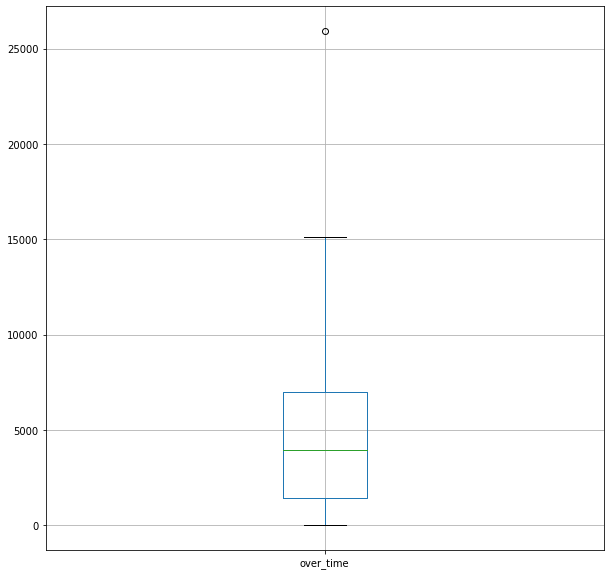

In [28]:
df_reg.boxplot(column=['over_time'],figsize=(10,10))

# Feature 12 : 'incentive' 

The feature 'incentive' represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

<AxesSubplot:>

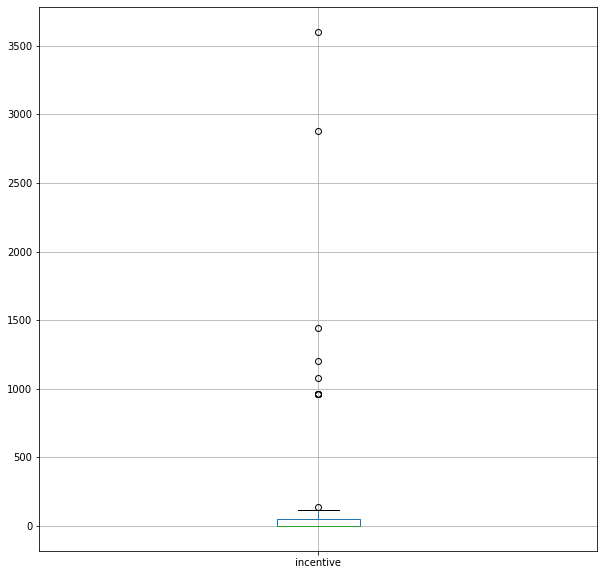

In [29]:
df_reg.boxplot(column=['incentive'],figsize=(10,10))

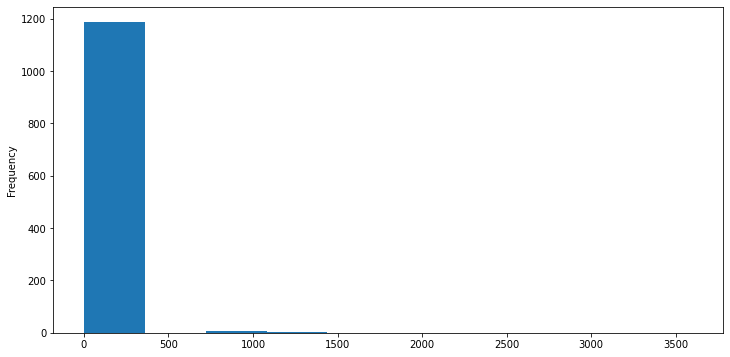

In [30]:
df_reg['incentive'].plot(kind='hist')
plt.show()

Observation : There are a few high incentives involved. May be those speicific high incentive tasks
belong to a particular department and team. We will see it soon!

# Feature 13 : 'idle_time' 

The feature'idle_time' represents the amount of time when the production was interrupted due to several reasons.

<AxesSubplot:>

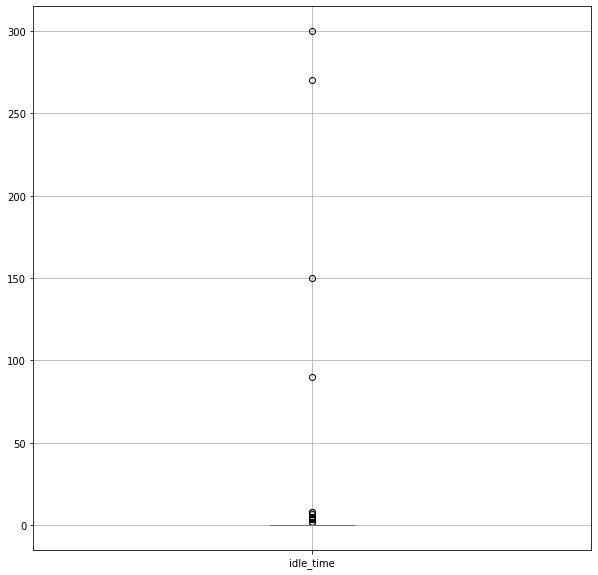

In [31]:
df_reg.boxplot(column=['idle_time'],figsize=(10,10))

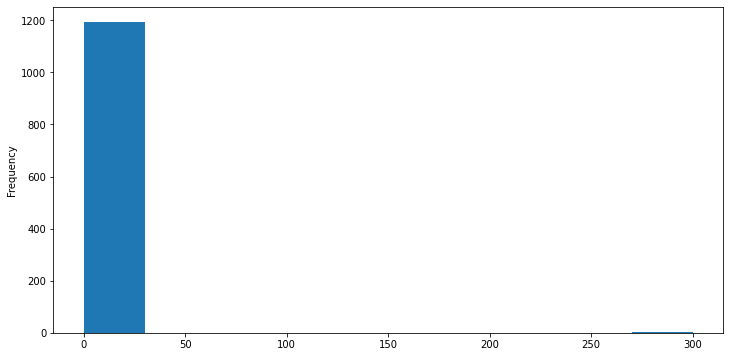

In [32]:
df_reg['idle_time'].plot(kind='hist')
plt.show()

Observation : Idle time is between 0-30 minutes (approx.) for most of the observations, however a few tasks might possess a
large idle time

# Feature 14 : 'idle_men' 

The feature 'idle_men'represents the number of workers who were idle due to production interruption.

<AxesSubplot:>

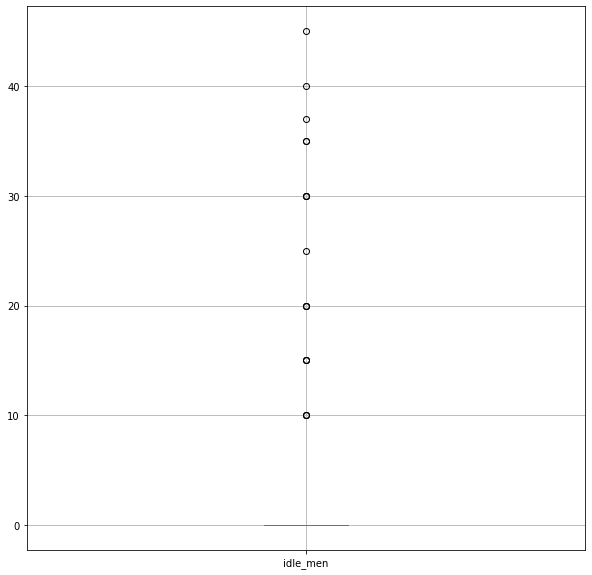

In [33]:
df_reg.boxplot(column=['idle_men'],figsize=(10,10))

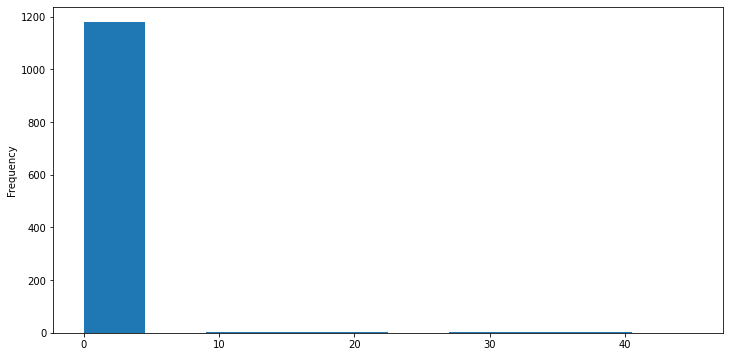

In [34]:
df_reg['idle_men'].plot(kind='hist')
plt.show()

Observation : Because of low idle time for most of the observations the frequency of number of idle 
men is higher between 0-5, however a few tasks might possess a large idle time so more workers might be idle
for those tasks.

# Feature 15 : 'actual_productivity'

The feature 'actual_productivity'represents the actual % of productivity that was delivered by the workers. It ranges from 0-1.

<AxesSubplot:>

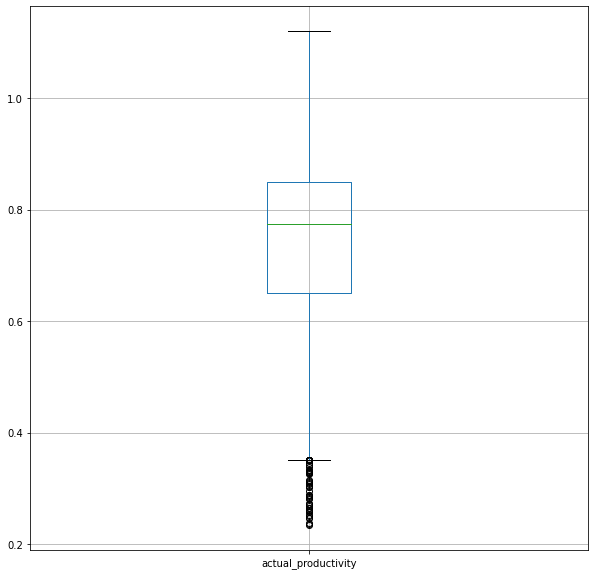

In [35]:
df_reg.boxplot(column=['actual_productivity'],figsize=(10,10))

Observation : Average actual productivity across the board is below 75% in contrast to average targeted productivity (more than 75%). Targeted prodcutivity tends to inflate more

# Performance Measure

In [36]:
df_reg_performance = df_reg.copy()

df_reg_performance['difference'] = df_reg.actual_productivity - df_reg.targeted_productivity
df_reg_performance.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'difference'],
      dtype='object')

In [37]:
df_reg_performance['Perform_label'] = np.nan
df_reg_performance.head()
df_reg_performance.loc[df_reg_performance['difference']<0,'Perform_label'] = -1
df_reg_performance.loc[(df_reg_performance['difference']==0), 'Perform_label'] = 0
df_reg_performance.loc[df_reg_performance['difference']>0, 'Perform_label'] = 1
df_reg_performance.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,difference,Perform_label
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725,1.0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.136500,1.0
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1.0
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1.0
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382,1.0


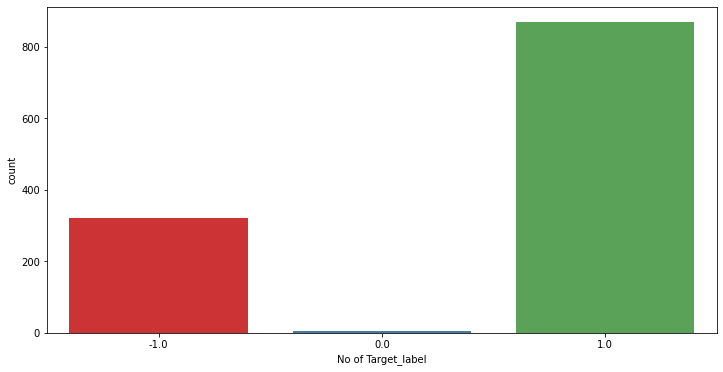

In [38]:
perform_label_plo = sns.countplot(x = 'Perform_label', data = df_reg_performance, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

So, there are more over-performance records than under-performed. It seems that expected productvity performance
is hardly forecasted correctly

# Some more insights from the feature combinations

# (A) Distribution of 'smv' in 'team' across 'department'

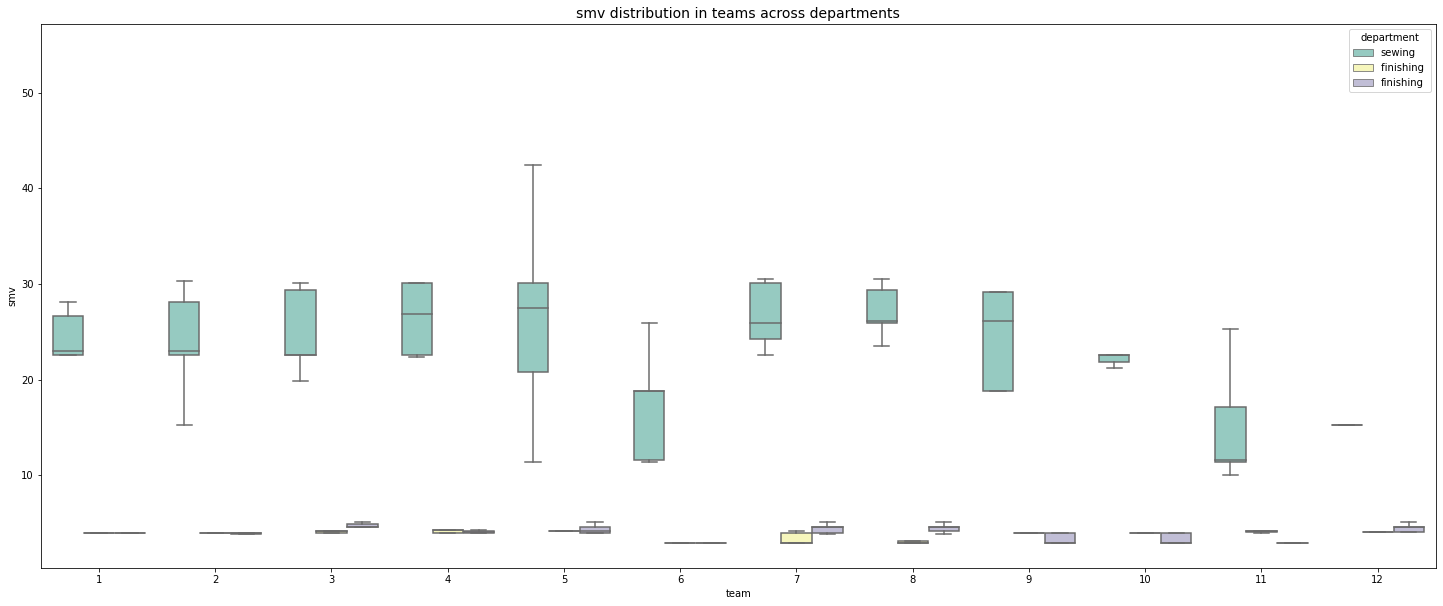

In [39]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = df_reg,
     palette = palette, fliersize = 0)

plt.title('smv distribution in teams across departments',fontsize= 14)
plt.show()

Observation : There are large variations across teams in the sewing department whereas the finishing department has almost 
even smv distribution for all teams

# (B) How 'department' affects 'over_time'

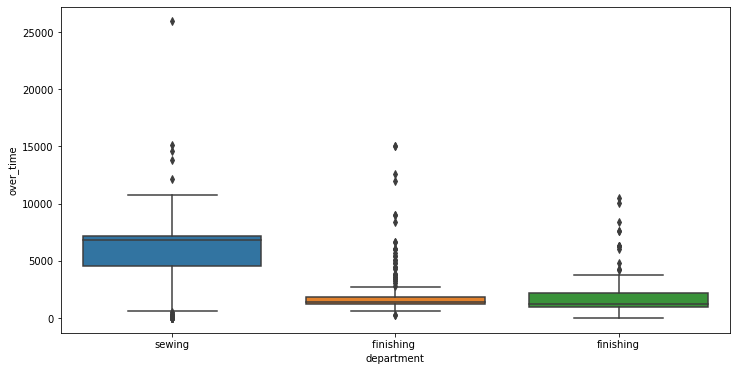

In [40]:
sns.boxplot(x = 'department', y = 'over_time',data = df_reg)
plt.show()

Observation : Employees in 'Sewing' department tend to have more over time

# (C) How 'team' affects 'over_time'

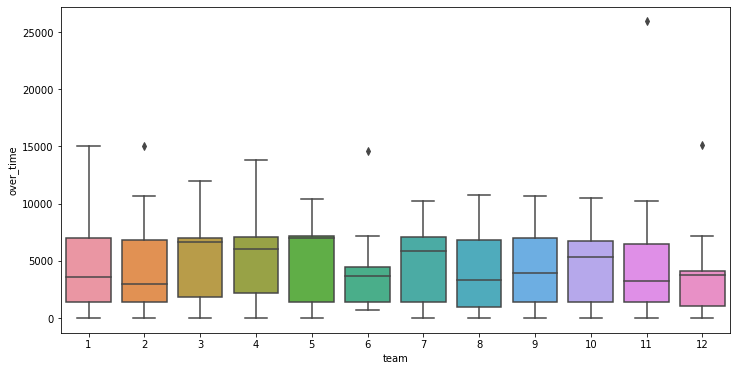

In [41]:
sns.boxplot(x = 'team', y = 'over_time',data = df_reg)
plt.show()

Observation : High frequency of over time is found in teams 3, 5, 7 and 10 than the rest of the teams. Team 1 exibits the maximum over time of 15000 minutes.

#A distribution is considered "Positively Skewed" when mean > median. It means the data constitute higher frequency of high valued scores.

#A distribution is considered "Negatively Skewed" when mean < median. It means the data constitute higher frequency of low valued scores.

# (D) Which department and quarter are prone to high incentive

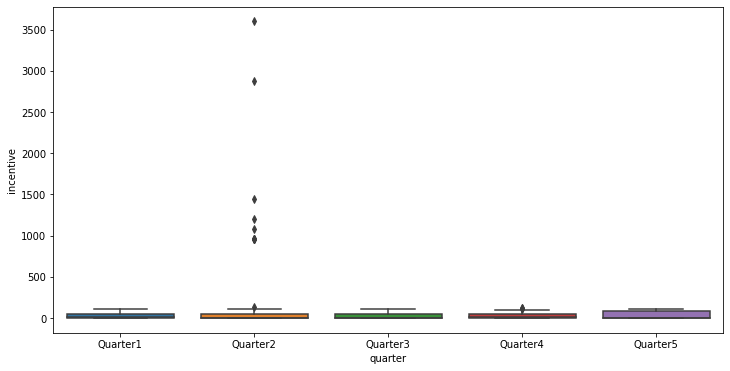

In [42]:
sns.boxplot(x = 'quarter', y = 'incentive',data = df_reg)
plt.show()

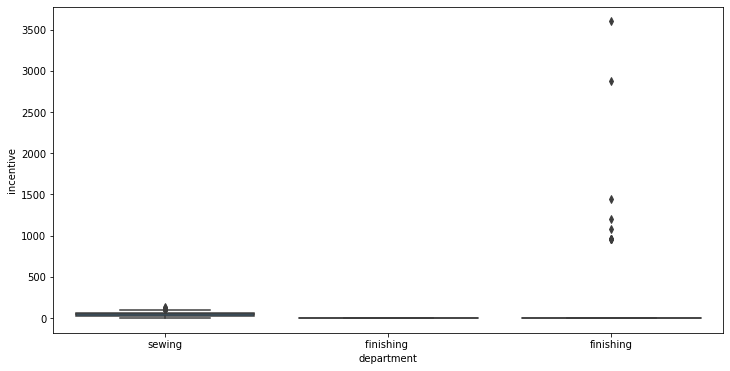

In [43]:
sns.boxplot(x = 'department', y = 'incentive',data = df_reg)
plt.show()

Observation : Most high incentive values belong to the 'finishing' department and 'Quarter2'

# (E) Which department has most idle_time and idle_men

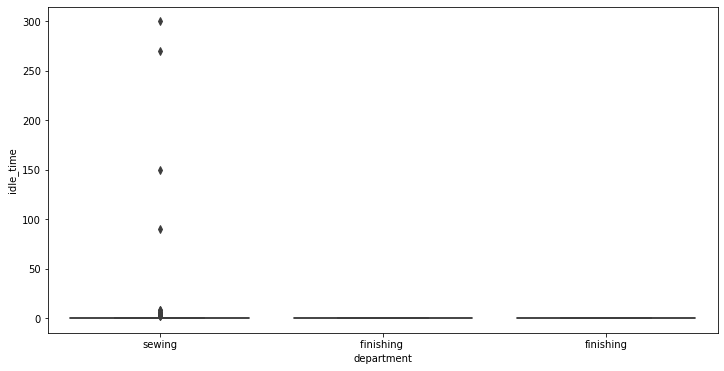

In [44]:
sns.boxplot(x = 'department', y = 'idle_time',data = df_reg)
plt.show()

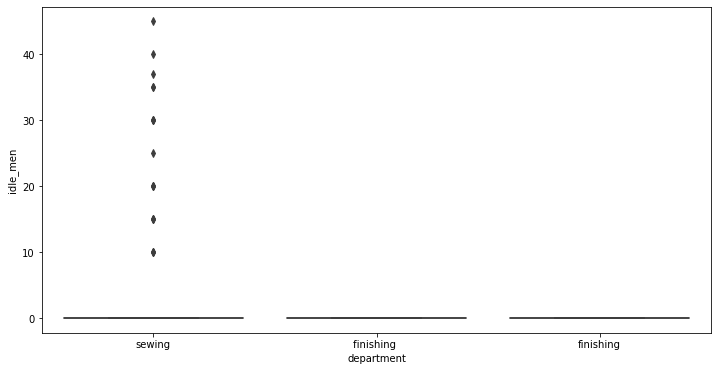

In [45]:
sns.boxplot(x = 'department', y = 'idle_men',data = df_reg)
plt.show()

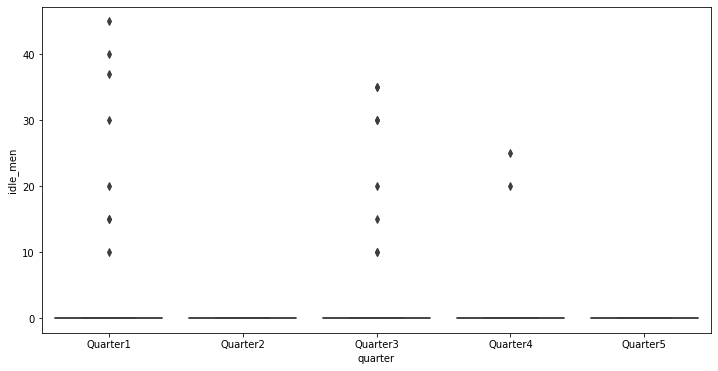

In [46]:
sns.boxplot(x = 'quarter', y = 'idle_men',data = df_reg)
plt.show()

Observation : Sewing department seems to get much production interruption and hence more number of idle workers and in 'Quarter1'

# (F) Which quarter experiences the most no_of_style_change

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


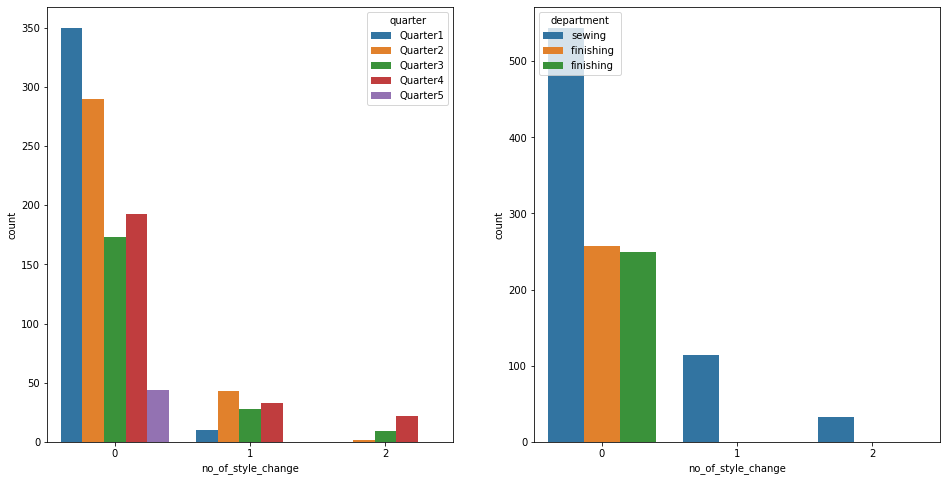

In [47]:
plt.figure(figsize = (16, 8))
palette = 'gist_rainbow'

plt.subplot(1, 2, 1)
sns.countplot('no_of_style_change',hue = 'quarter',data = df_reg)
plt.xlabel('no_of_style_change')

plt.subplot(1, 2, 2)
sns.countplot('no_of_style_change',hue = 'department',data = df_reg)
plt.xlabel('no_of_style_change')

plt.show()

Observation : 
Number of style change comes mostly in Quarter2 and Quarter4.
Quarter5 never experienced any style change request.
Only 'Sewing' department experinecs style change request

# (G) Actual_productivity distribution across teams and department

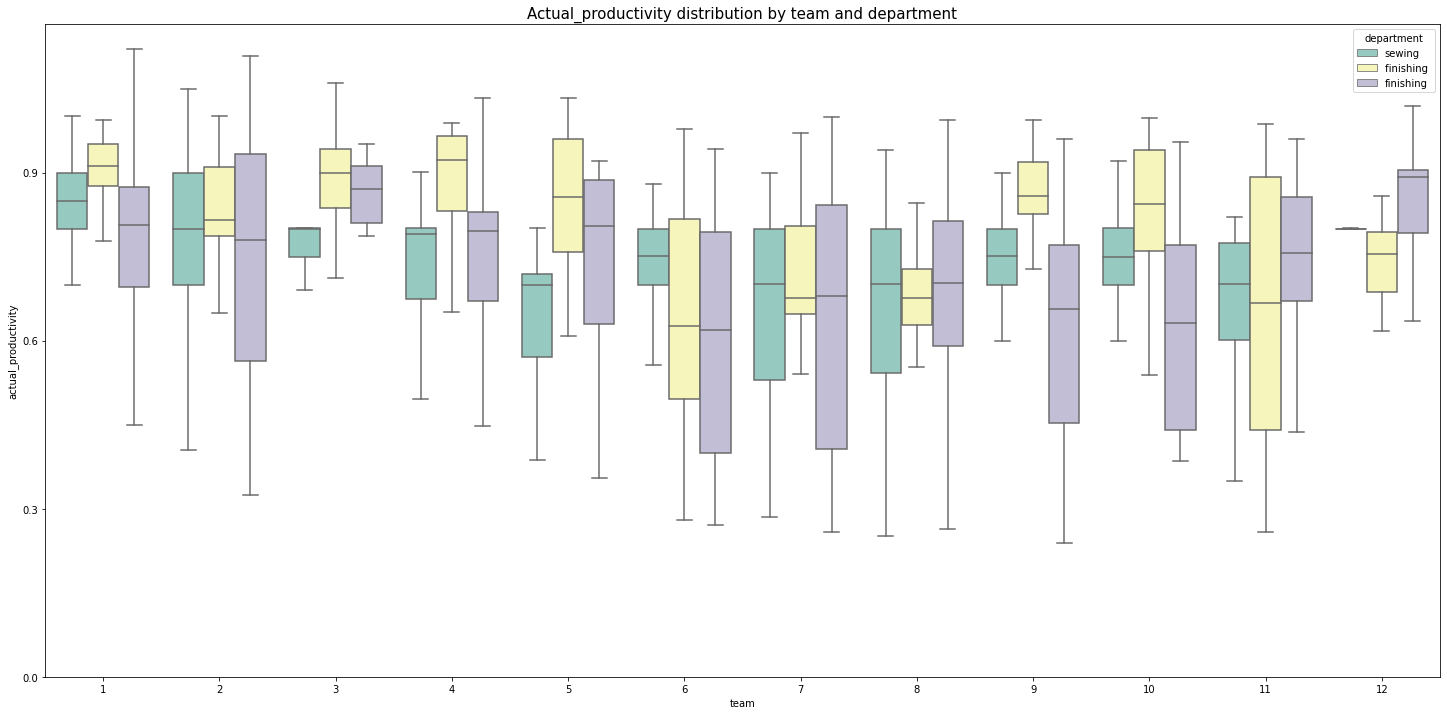

In [48]:
plt.figure(figsize=(25, 12))
palette = "Set3"

sns.boxplot(x = 'team', y = 'actual_productivity', data = df_reg,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Actual_productivity distribution by team and department',fontsize = 15)
plt.show()

# Parsing the missing values across multiple columns

In [49]:
df_reg.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

ONLY 'wip' feature seems to have missing values worth (506/(1196*15)) or 2.8%. So to adjust missing values we spread the missing values across other columns to make it 5-10% across the dataset

In [50]:
df_reg['department'].replace({'finishing ':np.nan}, inplace = True)
df_reg['quarter'].replace({'Quarter5':np.nan}, inplace = True)
df_reg['targeted_productivity'].replace({0.07:np.nan}, inplace = True)
df_reg['incentive'].replace({0:np.nan}, inplace = True)

In [51]:
df_reg.isnull().sum()

date                       0
quarter                   44
department               257
day                        0
team                       0
targeted_productivity      1
smv                        0
wip                      506
over_time                  0
incentive                604
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [52]:
percent_missing = df_reg.isnull().sum() * 100 / len(df_reg)
percent_missing

date                      0.000000
quarter                   3.675856
department               21.470343
day                       0.000000
team                      0.000000
targeted_productivity     0.083542
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                50.459482
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [53]:
missing_across_dataset = df_reg.isnull().sum().sum()/(len(df_reg)*15)
missing_across_dataset

0.07864104706209969

Now the missing value across the entire dataset becomes 7.8% which is acceptable in terms of project requirement

In [54]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1153 non-null   object 
 2   department             940 non-null    object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1196 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              593 non-null    float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# No of rows having at least 1 Missing value

In [55]:
sum([True for idx,row in df_reg.iterrows() if any(row.isnull())])

634

# Transforming a few data types 

In [56]:
#converting 'date' to datetime
df_reg['date'] = df_reg['date'].astype(np.datetime64)

#converting 'team' to object
df_reg['team'] = df_reg['team'].astype(str)

In [57]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1153 non-null   object        
 2   department             940 non-null    object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1196 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              593 non-null    float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

# Data Preparation and Imputation of Missing Values:

# Feature : 'quarter'

In [58]:
df_reg['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', nan], dtype=object)

In [59]:
# finding the most frequent value in quarter column
quarter_mode = df_reg['quarter'].value_counts().idxmax()
#quarter_mode = df_reg['quarter'].value_counts()
quarter_mode

'Quarter1'

In [60]:
# imputing missing values with Quarter1
df_reg['quarter'].fillna(quarter_mode, inplace = True)

In [61]:
df_reg['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

# Feature : 'department'

In [62]:
df_reg['department'].unique()

array(['sewing', nan, 'finishing'], dtype=object)

In [63]:
# Spelling correction : 'sweing' to 'sewing'
df_reg['department']=df_reg['department'].replace(['sweing'],['sewing'])

In [64]:
# finding the most frequent value in 'department' column
dept_mode = df_reg['department'].value_counts().idxmax()
#dept_mode = df_reg['department'].value_counts()
dept_mode

'sewing'

In [65]:
# imputing missing values with 'sewing'
df_reg['department'].fillna(dept_mode, inplace = True)

# Feature : 'wip'

In [66]:
df_reg['wip'].unique()

array([1.1080e+03,        nan, 9.6800e+02, 1.1700e+03, 9.8400e+02,
       7.9500e+02, 7.3300e+02, 6.8100e+02, 8.7200e+02, 5.7800e+02,
       6.6800e+02, 8.6100e+02, 7.7200e+02, 9.1300e+02, 1.2610e+03,
       8.4400e+02, 1.0050e+03, 6.5900e+02, 1.1520e+03, 1.1380e+03,
       6.1000e+02, 9.4400e+02, 5.4400e+02, 1.0720e+03, 5.3900e+02,
       1.2780e+03, 1.2270e+03, 1.0390e+03, 8.7800e+02, 1.0330e+03,
       7.8200e+02, 1.2160e+03, 5.1300e+02, 7.3400e+02, 1.2020e+03,
       8.8400e+02, 1.2550e+03, 1.0470e+03, 6.7800e+02, 7.1200e+02,
       1.0370e+03, 7.5700e+02, 7.5900e+02, 1.0830e+03, 6.6600e+02,
       1.1870e+03, 1.3050e+03, 7.1600e+02, 9.2500e+02, 9.6300e+02,
       1.1010e+03, 1.0350e+03, 9.1000e+02, 1.2090e+03, 5.9000e+02,
       8.0800e+02, 1.1790e+03, 1.3240e+03, 1.1350e+03, 7.7600e+02,
       9.9000e+02, 9.8600e+02, 9.2400e+02, 1.1200e+03, 1.0660e+03,
       1.1440e+03, 4.1300e+02, 5.6800e+02, 1.1890e+03, 9.4200e+02,
       1.0500e+03, 1.0260e+03, 7.8300e+02, 8.5700e+02, 5.4800e

<AxesSubplot:>

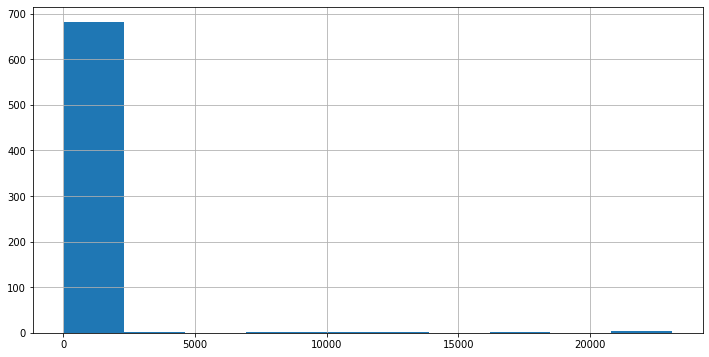

In [67]:
df_reg['wip'].hist()

'wip' has a skewed right distribution

In [68]:
med_wip = df_reg['wip'].median()
med_wip
df_reg['wip'].fillna(med_wip, inplace=True)

In [69]:
df_reg['wip'].unique()

array([1.1080e+03, 1.0390e+03, 9.6800e+02, 1.1700e+03, 9.8400e+02,
       7.9500e+02, 7.3300e+02, 6.8100e+02, 8.7200e+02, 5.7800e+02,
       6.6800e+02, 8.6100e+02, 7.7200e+02, 9.1300e+02, 1.2610e+03,
       8.4400e+02, 1.0050e+03, 6.5900e+02, 1.1520e+03, 1.1380e+03,
       6.1000e+02, 9.4400e+02, 5.4400e+02, 1.0720e+03, 5.3900e+02,
       1.2780e+03, 1.2270e+03, 8.7800e+02, 1.0330e+03, 7.8200e+02,
       1.2160e+03, 5.1300e+02, 7.3400e+02, 1.2020e+03, 8.8400e+02,
       1.2550e+03, 1.0470e+03, 6.7800e+02, 7.1200e+02, 1.0370e+03,
       7.5700e+02, 7.5900e+02, 1.0830e+03, 6.6600e+02, 1.1870e+03,
       1.3050e+03, 7.1600e+02, 9.2500e+02, 9.6300e+02, 1.1010e+03,
       1.0350e+03, 9.1000e+02, 1.2090e+03, 5.9000e+02, 8.0800e+02,
       1.1790e+03, 1.3240e+03, 1.1350e+03, 7.7600e+02, 9.9000e+02,
       9.8600e+02, 9.2400e+02, 1.1200e+03, 1.0660e+03, 1.1440e+03,
       4.1300e+02, 5.6800e+02, 1.1890e+03, 9.4200e+02, 1.0500e+03,
       1.0260e+03, 7.8300e+02, 8.5700e+02, 5.4800e+02, 4.1100e

# Feature : 'incentive'

In [70]:
df_reg['incentive'].unique()

array([  98.,   nan,   50.,   38.,   45.,   34.,   44.,   63.,   56.,
         40.,   60.,   26.,   75.,   23.,   35.,   69.,   88.,   30.,
         54.,   37.,   70.,   27.,   21.,   24.,   94.,   29.,   81.,
         55.,  119.,   90.,  113.,   46.,  100.,   53.,   93.,   49.,
        138.,   33.,   32.,   62.,   65.,  960., 1080., 2880., 3600.,
       1440., 1200.,   25.])

In [71]:
# finding the most frequent value in 'incentive' column
incnt_mode = df_reg['incentive'].value_counts().idxmax()
incnt_mode

50.0

In [72]:
df_reg['incentive'].fillna(incnt_mode, inplace=True)

In [73]:
df_reg['incentive'].unique()

array([  98.,   50.,   38.,   45.,   34.,   44.,   63.,   56.,   40.,
         60.,   26.,   75.,   23.,   35.,   69.,   88.,   30.,   54.,
         37.,   70.,   27.,   21.,   24.,   94.,   29.,   81.,   55.,
        119.,   90.,  113.,   46.,  100.,   53.,   93.,   49.,  138.,
         33.,   32.,   62.,   65.,  960., 1080., 2880., 3600., 1440.,
       1200.,   25.])

# Feature : 'targeted_productivity'

In [74]:
df_reg['targeted_productivity'].unique()

array([0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.35, 0.5 ,  nan, 0.4 ])

In [75]:
# finding the most frequent value in 'incentive' column
trgprd_mode = df_reg['targeted_productivity'].value_counts().idxmax()
trgprd_mode

0.8

In [76]:
df_reg['targeted_productivity'].fillna(trgprd_mode, inplace=True)

In [77]:
df_reg['targeted_productivity'].unique()

array([0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.35, 0.5 , 0.4 ])

# Feature Transformation

In [78]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [79]:
df_reg['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [80]:
#'quarter' is a categorical nominal variables of 4 distinct values, so we replace it with a one-hot-vector of length 5
cols = pd.get_dummies(df_reg['quarter'])
df_reg[cols.columns] = cols
df_reg.drop('quarter', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   department             1197 non-null   object        
 2   day                    1197 non-null   object        
 3   team                   1197 non-null   object        
 4   targeted_productivity  1197 non-null   float64       
 5   smv                    1197 non-null   float64       
 6   wip                    1197 non-null   float64       
 7   over_time              1197 non-null   int64         
 8   incentive              1197 non-null   float64       
 9   idle_time              1197 non-null   float64       
 10  idle_men               1197 non-null   int64         
 11  no_of_style_change     1197 non-null   int64         
 12  no_of_workers          1197 non-null   float64       
 13  act

In [81]:
#converting Quarter1 - Quarter4 to object
df_reg['Quarter1'] = df_reg['Quarter1'].astype(str)
df_reg['Quarter2'] = df_reg['Quarter2'].astype(str)
df_reg['Quarter3'] = df_reg['Quarter3'].astype(str)
df_reg['Quarter4'] = df_reg['Quarter4'].astype(str)

In [82]:
df_reg['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [83]:
#'department' is a categorical nominal variables of 2 distinct values, so we replace it with a one-hot-vector of length 5
df_reg['department'] = df_reg['department'].astype(str)
cols = pd.get_dummies(df_reg['department'], prefix = 'dept')
df_reg[cols.columns] = cols
df_reg.drop('department', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   day                    1197 non-null   object        
 2   team                   1197 non-null   object        
 3   targeted_productivity  1197 non-null   float64       
 4   smv                    1197 non-null   float64       
 5   wip                    1197 non-null   float64       
 6   over_time              1197 non-null   int64         
 7   incentive              1197 non-null   float64       
 8   idle_time              1197 non-null   float64       
 9   idle_men               1197 non-null   int64         
 10  no_of_style_change     1197 non-null   int64         
 11  no_of_workers          1197 non-null   float64       
 12  actual_productivity    1197 non-null   float64       
 13  Qua

In [84]:
#converting 2 departments to object
df_reg['dept_finishing'] = df_reg['dept_finishing'].astype(str)
df_reg['dept_sewing'] = df_reg['dept_sewing'].astype(str)

In [85]:
df_reg.team.values

array(['8', '1', '11', ..., '7', '9', '6'], dtype=object)

In [86]:
#'team' is a categorical nominal variables of 12 distinct values , so we replace it with a one-hot vector of length 12
df_reg['team'] = df_reg['team'].astype(int)
cols = pd.get_dummies(df_reg['team'], prefix= 'team')
df_reg[cols.columns] = cols
df_reg.drop('team', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   day                    1197 non-null   object        
 2   targeted_productivity  1197 non-null   float64       
 3   smv                    1197 non-null   float64       
 4   wip                    1197 non-null   float64       
 5   over_time              1197 non-null   int64         
 6   incentive              1197 non-null   float64       
 7   idle_time              1197 non-null   float64       
 8   idle_men               1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
 12  Quarter1               1197 non-null   object        
 13  Qua

In [87]:
df_reg.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [88]:
#converting 12 teams to object
df_reg['team_1'] = df_reg['team_1'].astype(str)
df_reg['team_2'] = df_reg['team_2'].astype(str)
df_reg['team_3'] = df_reg['team_3'].astype(str)
df_reg['team_4'] = df_reg['team_4'].astype(str)
df_reg['team_5'] = df_reg['team_5'].astype(str)
df_reg['team_6'] = df_reg['team_6'].astype(str)
df_reg['team_7'] = df_reg['team_7'].astype(str)
df_reg['team_8'] = df_reg['team_8'].astype(str)
df_reg['team_9'] = df_reg['team_9'].astype(str)
df_reg['team_10'] = df_reg['team_10'].astype(str)
df_reg['team_11'] = df_reg['team_11'].astype(str)
df_reg['team_12'] = df_reg['team_12'].astype(str)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   day                    1197 non-null   object        
 2   targeted_productivity  1197 non-null   float64       
 3   smv                    1197 non-null   float64       
 4   wip                    1197 non-null   float64       
 5   over_time              1197 non-null   int64         
 6   incentive              1197 non-null   float64       
 7   idle_time              1197 non-null   float64       
 8   idle_men               1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
 12  Quarter1               1197 non-null   object        
 13  Qua

In [89]:
#'day' is a categorical nominal variable of 6 distinct values , so we replace it with a one-hot vector of length 6
cols = pd.get_dummies(df_reg['day'])
df_reg[cols.columns] = cols
df_reg.drop('day', axis = 1, inplace = True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   targeted_productivity  1197 non-null   float64       
 2   smv                    1197 non-null   float64       
 3   wip                    1197 non-null   float64       
 4   over_time              1197 non-null   int64         
 5   incentive              1197 non-null   float64       
 6   idle_time              1197 non-null   float64       
 7   idle_men               1197 non-null   int64         
 8   no_of_style_change     1197 non-null   int64         
 9   no_of_workers          1197 non-null   float64       
 10  actual_productivity    1197 non-null   float64       
 11  Quarter1               1197 non-null   object        
 12  Quarter2               1197 non-null   object        
 13  Qua

In [90]:
#converting 6 days to object
df_reg['Monday'] = df_reg['Monday'].astype(str)
df_reg['Tuesday'] = df_reg['Tuesday'].astype(str)
df_reg['Wednesday'] = df_reg['Wednesday'].astype(str)
df_reg['Thursday'] = df_reg['Thursday'].astype(str)
df_reg['Saturday'] = df_reg['Saturday'].astype(str)
df_reg['Sunday'] = df_reg['Sunday'].astype(str)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   targeted_productivity  1197 non-null   float64       
 2   smv                    1197 non-null   float64       
 3   wip                    1197 non-null   float64       
 4   over_time              1197 non-null   int64         
 5   incentive              1197 non-null   float64       
 6   idle_time              1197 non-null   float64       
 7   idle_men               1197 non-null   int64         
 8   no_of_style_change     1197 non-null   int64         
 9   no_of_workers          1197 non-null   float64       
 10  actual_productivity    1197 non-null   float64       
 11  Quarter1               1197 non-null   object        
 12  Quarter2               1197 non-null   object        
 13  Qua

In [91]:
#df_reg["Date"] = pd.to_datetime(df_reg['date'])
#df_reg["year"] = df_reg["date"].dt.year
#df_reg["day"] = df_reg["date"].dt.day
#df_reg["month"] = df_reg["date"].dt.month

# Drop original columns Date
df_reg.drop('date', axis=1, inplace=True)
print (f"Feature names after data wrangling :\n\n {df_reg.columns}")

Feature names after data wrangling :

 Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4',
       'dept_finishing', 'dept_sewing', 'team_1', 'team_2', 'team_3', 'team_4',
       'team_5', 'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


# Heat map Visualization on Correlation

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines
sns.set_style("darkgrid")

<AxesSubplot:>

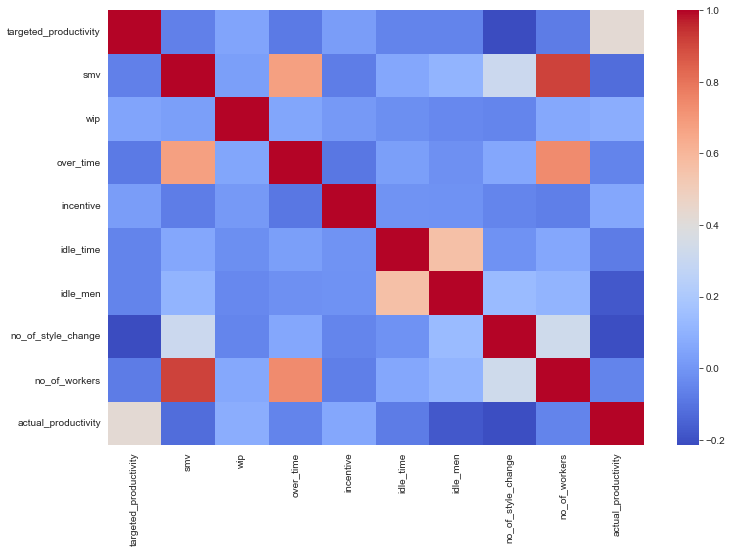

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(df_reg.corr(),cmap="coolwarm")

In [94]:
df_reg['no_of_workers'].corr(df_reg['smv'])

0.9121763124916776

In [95]:
df_reg['no_of_workers'].corr(df_reg['over_time'])

0.7341641744474343

In [96]:
df_reg['over_time'].corr(df_reg['smv'])

0.6748874395933928

In [97]:
df_reg['idle_men'].corr(df_reg['idle_time'])

0.5591459152184007

Highest Positive Correlations:

    No_of workers and smv (0.91)
    No_of workers and over_time (0.73)
    Over_time and smv (0.67)
    Idle_men and Idle_time (0.56)

    Positive Correlations:

    No_of workers and no_of_style_change(0.33)
    No_of_style_changehas and smv (0.32)
    There isnt any obvious negative correlation between features

In [98]:
# Let's check the correlation of features with target feature.
df_corr = df_reg.copy()
correlation_matrix = df_corr.corr()
# Interested only in the relation with target feature 'actual_productivity'
correlation_matrix=correlation_matrix['actual_productivity']
correlation_matrix=correlation_matrix.to_frame()
correlation_matrix.sort_values(by='actual_productivity',ascending=False,inplace=True)
display(correlation_matrix)

,actual_productivity
actual_productivity,1.000000
targeted_productivity,0.422013
wip,0.083545
incentive,0.057687
over_time,-0.054206
no_of_workers,-0.057991
idle_time,-0.080851
smv,-0.122089
idle_men,-0.181734
no_of_style_change,-0.207366


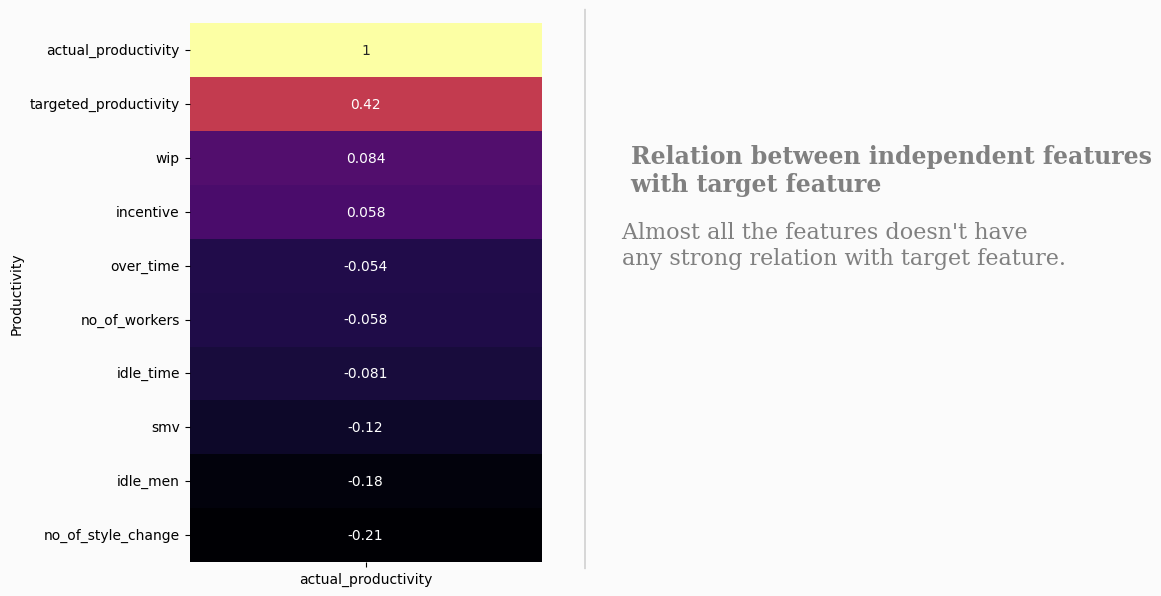

In [99]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

background_color='#fbfbfb'

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot 
sns.heatmap(correlation_matrix,cmap='inferno',annot=True,cbar=False,ax=ax0)
ax0.set_ylabel('Productivity')

   
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Relation between independent features
        with target feature
        ''')
#text content
fig.text(x=0.5,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        Almost all the features doesn't have 
        any strong relation with target feature.
        ''')
plt.show()

In [100]:
X = df_reg.drop('actual_productivity',axis=1)   #Feature Matrix
y = df_reg["actual_productivity"]          #Target Variable

# Splitting Dataset into Training and Testing set

I am working on the regression dataset, so I am utilizing StandardScaler() method to scale the data.
Generally, for regression we scale using StandardScaler() because for most linear models  we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Besides, standardization maintains useful information about outliers and makes the algorithm less sensitive to them. As some of the features of this dataset have outliers
I considered using StandardScaler().

In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Training Regression Model

We are going to present following regression model: 
    
Regression Models :
1. K Nearest Neighbors Regressor
2. Linear regression using the Normal Equation
3.  SGD Regressor
4.  Polynomial regression
5.  Ridge
6.  LASSO
7.  LinearSVR 
8.  SVR with kernel trick
        1. kernel='linear'
        2. kernel='rbf'
        3. kernel = 'poly’, degree
9. Decision Tree Regressor

# 1. K Neighbors Regressor

Model fitting with K-cross Validation and GridSearchCV

In [102]:
knn_reg = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,21))
param_grid_KNR = dict(n_neighbors = k_range)

#sklearn.metrics.SCORERS.keys()
grid_knn_reg = GridSearchCV(knn_reg, param_grid_KNR, cv = 5, return_train_score = True, scoring = 'r2',n_jobs = -1)

# fitting the model for grid search
grid_search_knn = grid_knn_reg.fit(X_train, y_train)

grid_search_knn.score(X_test, y_test)

0.1599078641771532

In [103]:
print("Best hyperparameter :",(grid_knn_reg.best_params_))
print("Best cross-validation score :",(grid_knn_reg.best_score_))

Best hyperparameter : {'n_neighbors': 19}
Best cross-validation score : 0.18327949645493963


In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
scores = cross_val_score(grid_knn_reg, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: %.4f"%scores.mean())

Cross-validation scores: [0.16994773 0.05691356 0.15404009 0.26023131 0.19346511]
Average cross-validation score: 0.1669


In [106]:
knn_reg_cs = cross_val_score(grid_knn_reg, X_train, y_train)
knn_cs=({"Cross Validation Score for train dataset: ": knn_reg_cs})
cs1=pd.DataFrame(knn_cs)
cs1

,Cross Validation Score for train dataset:
0,0.169948
1,0.056914
2,0.154040
3,0.260231
4,0.193465


In [107]:
knn_reg_cs = cross_val_score(grid_knn_reg, X_test, y_test)
knn_cs=({"Cross Validation Score for test dataset: ": knn_reg_cs})
cs2=pd.DataFrame(knn_cs)
cs2

,Cross Validation Score for test dataset:
0,0.039882
1,0.128846
2,-0.022910
3,0.195271
4,0.032426


In [108]:
print('Average Train Score: ', cs1.mean()[0])
print('Average Test Score: ', cs2.mean()[0])

Average Train Score:  0.1669195612761793
Average Test Score:  0.07470313005536174


In [109]:
Full_table=[['knn Regressor: ', grid_knn_reg.best_params_, cs1.mean()[0], cs2.mean()[0],grid_knn_reg.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963]]

# Plotting the K Neighbors Regressor r2 graph w.r.t n_neighbor values

Text(0, 0.5, 'r2')

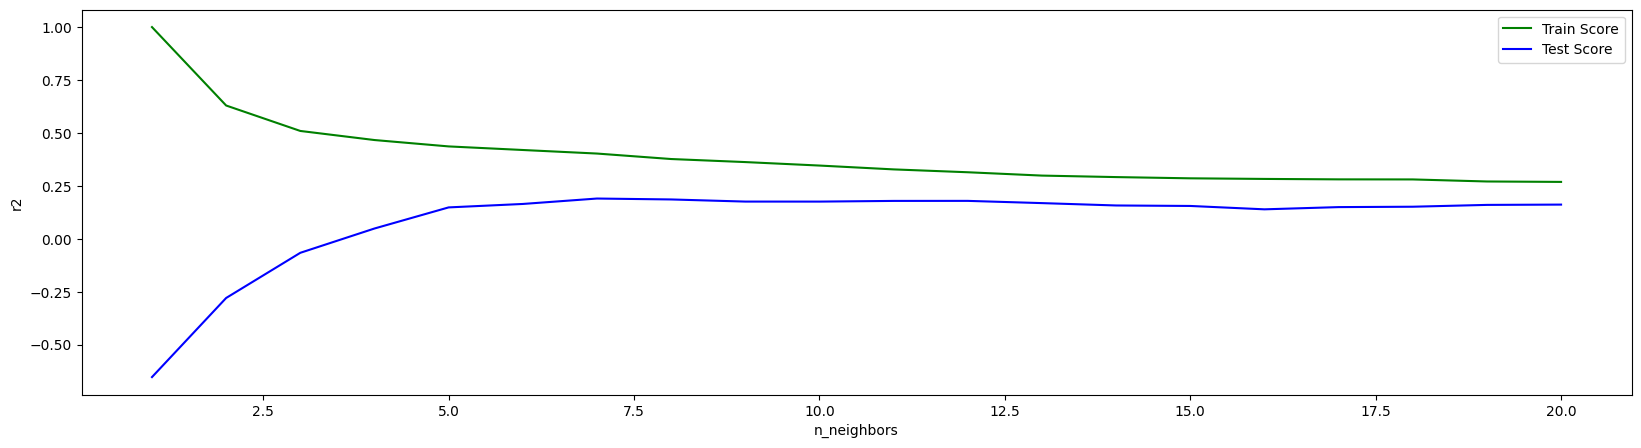

In [110]:
train_score_array = []
test_score_array = []
for k in k_range:
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
x_axis = k_range
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('r2')

# 2. Linear Regression using the Normal Equation

In [111]:
from sklearn.linear_model import LinearRegression

param_grid_LR = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

lin_reg = LinearRegression()

grid_lr = GridSearchCV(lin_reg, param_grid_LR, cv = 5, scoring= 'r2')
grid_lr.fit(X_train, y_train)

# fitting the model for grid search
grid_search_lr = grid_lr.fit(X_train, y_train)

grid_search_lr.score(X_test, y_test)

0.29062090289069087

In [112]:
print("Best hyperparameter :",(grid_lr.best_params_))
print("Best cross-validation score :",(grid_lr.best_score_))

Best hyperparameter : {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best cross-validation score : 0.24803791734392933


In [113]:
lreg_cs = cross_val_score(grid_lr, X_train, y_train)
linearReg_cs=({"Cross Validation Score: ": lreg_cs})
cs3=pd.DataFrame(linearReg_cs)
cs3

,Cross Validation Score:
0,0.250899
1,0.164471
2,0.239118
3,0.297254
4,0.282076


In [114]:
lreg_cs = cross_val_score(grid_lr, X_test, y_test)
linearReg_cs = ({"Cross Validation Score: ": lreg_cs})
cs4 = pd.DataFrame(linearReg_cs)
cs4

,Cross Validation Score:
0,0.116126
1,0.346994
2,0.206818
3,0.064134
4,0.067665


In [115]:
print('Average Train Score: ', cs3.mean()[0])
print('Average Test Score: ', cs4.mean()[0])

Average Train Score:  0.24676356429867852
Average Test Score:  0.1603475118106678


In [116]:
Full_table += [['Linear Regressor: ', grid_lr.best_params_, cs3.mean()[0], cs4.mean()[0],grid_lr.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933]]

# 3. SGD Regressor

In [117]:
from sklearn.linear_model import SGDRegressor

param_grid_SGD = {'eta0': [0.001, 0.01, 0.1], 'max_iter' : [1000, 5000, 10000]}
sgd_reg = SGDRegressor(random_state = 0, learning_rate = 'constant', penalty = 'l2', shuffle = False)

grid_sgd = GridSearchCV(sgd_reg, param_grid_SGD, cv = 5, scoring= 'r2')
grid_sgd.fit(X_train, y_train)

# fitting the model for grid search
grid_search_sgd = grid_sgd.fit(X_train, y_train)

grid_search_sgd.score(X_test, y_test)

#sgd_reg.fit(X_train, y_train)
#print(sgd_reg.score(X_train, y_train))
#print(sgd_reg.score(X_test, y_test))

0.2919553502581329

In [118]:
print("Best hyperparameter :", grid_search_sgd.best_params_)
print("Best cross-validation score :", grid_search_sgd.best_score_)

Best hyperparameter : {'eta0': 0.001, 'max_iter': 1000}
Best cross-validation score : 0.22254999474407305


sgd_reg_best = SGDRegressor(random_state = 0, learning_rate = 'constant', penalty = 'l2', eta0 = 0.01, max_iter = 1000, shuffle = False)

sgd_reg_best.fit(X_train, y_train)

print("Train score :", sgd_reg_best.score(X_train, y_train))
print("Test score :", sgd_reg_best.score(X_test, y_test))

In [119]:
sgd_cs = cross_val_score(grid_search_sgd, X_train, y_train)
sgdreg_cs=({"Cross Validation Score: ": sgd_cs})
cs5=pd.DataFrame(sgdreg_cs)
cs5

,Cross Validation Score:
0,0.215587
1,0.150230
2,0.188890
3,0.287213
4,0.270830


In [120]:
sgd_cs = cross_val_score(grid_search_sgd, X_test, y_test)
sgdreg_cs = ({"Cross Validation Score: ": sgd_cs})
cs6 = pd.DataFrame(sgdreg_cs)
cs6

,Cross Validation Score:
0,0.006350
1,0.146326
2,0.246370
3,0.125667
4,-0.021239


In [121]:
print('Average Train Score: ', cs5.mean()[0])
print('Average Test Score: ', cs6.mean()[0])

Average Train Score:  0.22254999474407305
Average Test Score:  0.10069499379891067


In [122]:
Full_table +=[['SGD Regressor: ', grid_search_sgd.best_params_,cs5.mean()[0], cs6.mean()[0],grid_search_sgd.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305]]

# 4. Polynomial Regression

In [123]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import Pipeline

In [124]:
lambdas = [2,3,4]

In [125]:
best_score = -999 #because the score results are negative, so keeping -999
best_parameters = {}
for degree in lambdas:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
score = poly_reg.score(X_test_poly, y_test)
if score > best_score:
        best_score = score
        best_parameters = {'degree': degree}

In [126]:
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

Best score: -1.93
Best parameters: {'degree': 4}


In [127]:
poly_cs = cross_val_score(poly_reg, X_train, y_train)
polynom_cs = ({"Cross Validation Score: ": poly_cs})
cs7 = pd.DataFrame(polynom_cs)
cs7

,Cross Validation Score:
0,0.253441
1,0.164471
2,0.239118
3,0.297254
4,0.279105


In [128]:
poly_cs = cross_val_score(poly_reg, X_test, y_test)
polynom_cs = ({"Cross Validation Score: ": poly_cs})
cs8 = pd.DataFrame(polynom_cs)
cs8

,Cross Validation Score:
0,0.114695
1,0.346994
2,0.206818
3,0.064633
4,0.067665


In [129]:
print('Average Train Score: ', cs7.mean()[0])
print('Average Test Score: ', cs8.mean()[0])

Average Train Score:  0.24667784746309365
Average Test Score:  0.16016097639466195


In [130]:
Full_table += [['Polynomial Regression: ', best_parameters, cs7.mean()[0], cs8.mean()[0], best_score]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444]]

# 5. RIDGE

In [131]:
from sklearn.linear_model import Ridge

In [132]:
ridge_reg = Ridge()

param_grid_PolyReg = {'alpha' : [0.01, 0.1, 1, 10, 100]}

#sklearn.metrics.SCORERS.keys()
grid_ridge_reg = GridSearchCV(ridge_reg, param_grid_PolyReg, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search
grid_search_ridge = grid_ridge_reg.fit(X_train, y_train)

grid_search_ridge.score(X_test, y_test)

0.29059990557208315

In [133]:
print("Best hyperparameter :", grid_search_ridge.best_params_)
print("Best x-validation score :", grid_search_ridge.best_score_)

Best hyperparameter : {'alpha': 0.01}
Best x-validation score : 0.24679128823813104


In [134]:
ridge_cs = cross_val_score(grid_search_ridge, X_train, y_train)
ridgereg_cs = ({"Cross Validation Score: ": ridge_cs})
cs9 = pd.DataFrame(ridgereg_cs)
cs9

,Cross Validation Score:
0,0.246918
1,0.165342
2,0.222643
3,0.295620
4,0.276783


In [135]:
ridge_cs = cross_val_score(grid_search_ridge, X_test, y_test)
ridgereg_cs = ({"Cross Validation Score: ": ridge_cs})
cs10 = pd.DataFrame(ridgereg_cs)
cs10

,Cross Validation Score:
0,0.156003
1,0.368985
2,0.238703
3,0.179650
4,0.134743


In [136]:
print('Average Train Score: ', cs9.mean()[0])
print('Average Test Score: ', cs10.mean()[0])

Average Train Score:  0.24146128832676506
Average Test Score:  0.21561705449620971


In [137]:
Full_table += [['Ridge Regression: ', grid_search_ridge.best_params_,cs9.mean()[0], cs10.mean()[0],grid_search_ridge.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444],
 ['Ridge Regression: ',
  {'alpha': 0.01},
  0.24146128832676506,
  0.21561705449620971,
  0.24679128823813104]]

# 6. Lasso

In [138]:
from sklearn.linear_model import Lasso

In [139]:
lasso = Lasso()

param_grid_LASSO = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

#sklearn.metrics.SCORERS.keys()
grid_lasso = GridSearchCV(lasso, param_grid_LASSO, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

# fitting the model for grid search
grid_search_lasso = grid_lasso.fit(X_train, y_train)

grid_search_lasso.score(X_test, y_test)

0.29439635135146136

In [140]:
print("Best hyperparameter :", grid_search_lasso.best_params_)
print("Best x-validation score :", grid_search_lasso.best_score_)

Best hyperparameter : {'alpha': 0.001}
Best x-validation score : 0.2506368626880606


In [141]:
lasso_cs = cross_val_score(grid_search_lasso, X_train, y_train)
lassoreg_cs = ({"Cross Validation Score: ": lasso_cs})
cs11 = pd.DataFrame(lassoreg_cs)
cs11

,Cross Validation Score:
0,0.252970
1,0.171246
2,0.249560
3,0.299782
4,0.279627


In [142]:
lasso_cs = cross_val_score(grid_search_lasso, X_test, y_test)
lassoreg_cs = ({"Cross Validation Score: ": lasso_cs})
cs12 = pd.DataFrame(lassoreg_cs)
cs12

,Cross Validation Score:
0,0.210155
1,0.416127
2,0.296131
3,0.155385
4,0.212195


In [143]:
print('Average Train Score: ', cs11.mean()[0])
print('Average Test Score: ', cs12.mean()[0])

Average Train Score:  0.2506368626880606
Average Test Score:  0.25799853123796784


In [144]:
Full_table += [['Lasso Regression: ', grid_search_lasso.best_params_,cs11.mean()[0], cs12.mean()[0], grid_search_lasso.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444],
 ['Ridge Regression: ',
  {'alpha': 0.01},
  0.24146128832676506,
  0.21561705449620971,
  0.24679128823813104],
 ['Lasso Regression: ',
  {'alpha': 0.001},
  0.2506368626880606,
  0.25799853123796784,
  0.2506368626880606]]

# Graph plot for lasso

[0.24323808518151313, 0.0, 0.0, 0.0, 0.0]
[0.265083691426238, -0.001456766113597352, -0.001456766113597352, -0.001456766113597352, -0.001456766113597352]


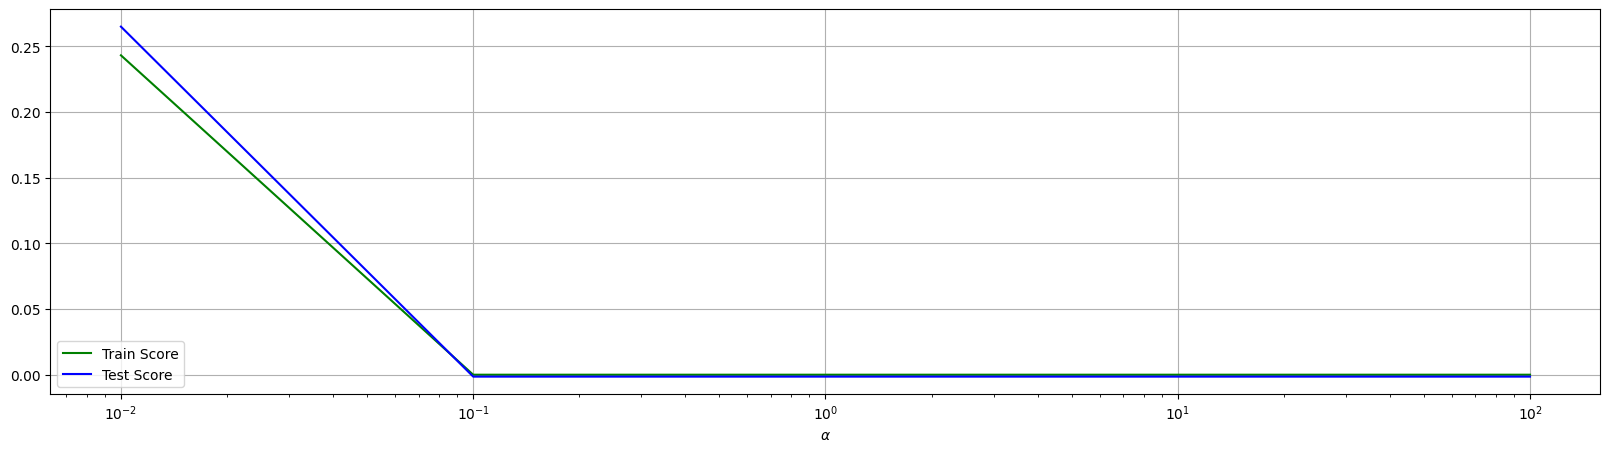

In [145]:
train_score_list = []
test_score_list = []
for alpha in [0.01, 0.1, 1, 10, 100]:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    train_score_list.append(lasso.score(X_train, y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    x_range = [0.01, 0.1, 1, 10, 100]
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()
print(train_score_list)
print(test_score_list)

In [146]:
%matplotlib inline

x_range1 = np.linspace(0.01, 0.1, 1, 10, 100).reshape(-1,1)
x_range2 = np.linspace(0.01, 0.1, 1, 10, 100).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

AttributeError: 'tuple' object has no attribute 'reshape'

# 7. Linear SVR

In [147]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR()

param_grid_LSVR = {'C':[0.001, 0.1, 1, 10, 100, 1000], 'epsilon':[0.001, 0.01, 0.1, 1], 'max_iter':[1000, 5000, 10000]}

#pred_svr = svr.predict(X_test)

grid_lsvr = GridSearchCV(lsvr, param_grid_LSVR, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

grid_search_lsvr = grid_lsvr.fit(X_train, y_train)

grid_search_lsvr.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.2825027485396504

In [148]:
print("Best hyperparameter :", grid_search_lsvr.best_params_)
print("Best x-validation score :", grid_search_lsvr.best_score_)

Best hyperparameter : {'C': 1, 'epsilon': 0.1, 'max_iter': 10000}
Best x-validation score : 0.24674176964599717


In [149]:
lsvr_cs = cross_val_score(grid_search_lsvr, X_train, y_train)
lsvrreg_cs = ({"Cross Validation Score: ": lsvr_cs})
cs13 = pd.DataFrame(lsvrreg_cs)
cs13

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Cross Validation Score:
0,0.247244
1,0.135273
2,0.221362
3,0.328915
4,0.273529


In [150]:
lsvr_cs = cross_val_score(grid_search_lsvr, X_test, y_test)
lsvrreg_cs = ({"Cross Validation Score: ": lsvr_cs})
cs14 = pd.DataFrame(lsvrreg_cs)
cs14

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Cross Validation Score:
0,0.201637
1,0.449654
2,0.254963
3,0.096300
4,0.219006


In [151]:
print('Average Train Score: ', cs13.mean()[0])
print('Average Test Score: ', cs14.mean()[0])

Average Train Score:  0.24126444351870183
Average Test Score:  0.24431194286976962


In [152]:
Full_table +=[['Linear SVR : ', grid_search_lsvr.best_params_,cs13.mean()[0], cs14.mean()[0], grid_search_lsvr.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444],
 ['Ridge Regression: ',
  {'alpha': 0.01},
  0.24146128832676506,
  0.21561705449620971,
  0.24679128823813104],
 ['Lasso Regression: ',
  {'alpha': 0.001},
  0.2506368626880606,
  0.25799853123796784,
  0.2506368626880606],
 ['Linear SVR : ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.24126444351870183,
  0.24431194286976962,
  0.24674176964599717]]

# 8. SVR with kernel trick

# a. kernel = 'linear'

In [153]:
from sklearn.svm import SVR

In [154]:
svr_ker_lin = SVR(kernel = 'linear')

param_grid_SVR_ker_lin = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


grid_svr_ker_lin = GridSearchCV(svr_ker_lin, param_grid_SVR_ker_lin, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

grid_search_svr_ker_lin = grid_svr_ker_lin.fit(X_train, y_train)


grid_search_svr_ker_lin.score(X_test, y_test)

0.2826858677354517

In [155]:
print("Best hyperparameter :", grid_search_svr_ker_lin.best_params_)
print("Best x-validation score :", grid_search_svr_ker_lin.best_score_)

Best hyperparameter : {'C': 10}
Best x-validation score : 0.2504620984774448


In [156]:
svrkl_cs = cross_val_score(grid_search_svr_ker_lin, X_train, y_train)
svrklreg_cs = ({"Cross Validation Score: ": svrkl_cs})
cs15 = pd.DataFrame(svrklreg_cs)
cs15

,Cross Validation Score:
0,0.244853
1,0.159349
2,0.236973
3,0.332486
4,0.274020


In [157]:
svrkl_cs = cross_val_score(grid_search_svr_ker_lin, X_test, y_test)
svrklreg_cs = ({"Cross Validation Score: ": svrkl_cs})
cs16 = pd.DataFrame(svrklreg_cs)
cs16

,Cross Validation Score:
0,0.153380
1,0.330739
2,0.169389
3,0.165958
4,0.074706


In [158]:
print('Average Train Score: ', cs15.mean()[0])
print('Average Test Score: ', cs16.mean()[0])

Average Train Score:  0.2495362801315765
Average Test Score:  0.17883418581598579


In [159]:
Full_table +=[['SVR kernel=linear : ', grid_search_svr_ker_lin.best_params_,cs15.mean()[0], cs16.mean()[0], grid_search_svr_ker_lin.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444],
 ['Ridge Regression: ',
  {'alpha': 0.01},
  0.24146128832676506,
  0.21561705449620971,
  0.24679128823813104],
 ['Lasso Regression: ',
  {'alpha': 0.001},
  0.2506368626880606,
  0.25799853123796784,
  0.2506368626880606],
 ['Linear SVR : ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.24126444351870183,
  0.24431194286976962,
  0.24674176964599717],
 ['SVR kernel=linear : ',
  {'C': 10},
  0.2495362801315765,
  0.17883418581598579,
  0.2504620984774448]]

# b. kernel = 'rbf'

In [160]:
from sklearn.svm import SVR

svr_ker_rbf = SVR(kernel = 'rbf')

param_grid_SVR_ker_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svr_ker_rbf = GridSearchCV(svr_ker_rbf, param_grid_SVR_ker_rbf, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

grid_search_svr_ker_rbf = grid_svr_ker_rbf.fit(X_train, y_train)

grid_search_svr_ker_rbf.score(X_test, y_test)

0.2918893347518271

In [161]:
print("Best hyperparameter :", grid_search_svr_ker_rbf.best_params_)
print("Best x-validation score :", grid_search_svr_ker_rbf.best_score_)

Best hyperparameter : {'C': 10, 'gamma': 0.001}
Best x-validation score : 0.29878246733942065


In [162]:
svrkrbf_cs = cross_val_score(grid_search_svr_ker_rbf, X_train, y_train)
svrkrbfreg_cs = ({"Cross Validation Score: ": svrkrbf_cs})
cs17 = pd.DataFrame(svrkrbfreg_cs)
cs17

,Cross Validation Score:
0,0.287744
1,0.214729
2,0.306197
3,0.328515
4,0.347480


In [163]:
svrkrbf_cs = cross_val_score(grid_search_svr_ker_rbf, X_test, y_test)
svrkrbfreg_cs = ({"Cross Validation Score: ": svrkrbf_cs})
cs18 = pd.DataFrame(svrkrbfreg_cs)
cs18

,Cross Validation Score:
0,0.152592
1,0.291873
2,0.187736
3,0.191334
4,0.057806


In [164]:
print('Average Train Score: ', cs17.mean()[0])
print('Average Test Score: ', cs18.mean()[0])

Average Train Score:  0.29693309571428256
Average Test Score:  0.17626820777178115


In [165]:
Full_table += [['SVR kernel=rbf : ', grid_search_svr_ker_rbf.best_params_,cs17.mean()[0], cs18.mean()[0], grid_search_svr_ker_rbf.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444],
 ['Ridge Regression: ',
  {'alpha': 0.01},
  0.24146128832676506,
  0.21561705449620971,
  0.24679128823813104],
 ['Lasso Regression: ',
  {'alpha': 0.001},
  0.2506368626880606,
  0.25799853123796784,
  0.2506368626880606],
 ['Linear SVR : ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.24126444351870183,
  0.24431194286976962,
  0.24674176964599717],
 ['SVR kernel=linear : ',
  {'C': 10},
  0.2495362801315765,
  0.17883418581598579,
  0.2504620984774448],
 ['SVR kernel=rbf : '

# c. kernel = 'poly' (with degree = 3)

In [166]:
from sklearn.svm import SVR

svr_ker_poly = SVR(kernel = 'poly', degree = 3)

param_grid_SVR_ker_poly = {'C': [0.01, 0.1, 1, 10, 100]}

grid_svr_ker_poly = GridSearchCV(svr_ker_poly, param_grid_SVR_ker_poly, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

grid_search_svr_ker_poly = grid_svr_ker_poly.fit(X_train, y_train)

grid_search_svr_ker_poly.score(X_test, y_test)

0.20122473262752838

In [167]:
print("Best hyperparameter :", grid_search_svr_ker_poly.best_params_)
print("Best x-validation score :", grid_search_svr_ker_poly.best_score_)

Best hyperparameter : {'C': 0.1}
Best x-validation score : 0.15505658599605293


In [168]:
svrkp_cs = cross_val_score(grid_search_svr_ker_poly, X_train, y_train)
svrkpreg_cs = ({"Cross Validation Score: ": svrkp_cs})
cs19 = pd.DataFrame(svrkpreg_cs)
cs19

,Cross Validation Score:
0,0.182305
1,0.150231
2,-0.043371
3,0.272868
4,0.213249


In [169]:
svrkp_cs = cross_val_score(grid_search_svr_ker_poly, X_test, y_test)
sgdreg_cs = ({"Cross Validation Score: ": svrkp_cs})
cs20 = pd.DataFrame(sgdreg_cs)
cs20

,Cross Validation Score:
0,-0.090312
1,0.250622
2,0.094980
3,0.074180
4,0.039504


In [170]:
print('Average Train Score: ', cs19.mean()[0])
print('Average Test Score: ', cs20.mean()[0])

Average Train Score:  0.15505658599605293
Average Test Score:  0.07379472188873148


In [171]:
Full_table += [['SVR kernel=poly : ', grid_search_svr_ker_poly.best_params_,cs19.mean()[0], cs20.mean()[0], grid_search_svr_ker_poly.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444],
 ['Ridge Regression: ',
  {'alpha': 0.01},
  0.24146128832676506,
  0.21561705449620971,
  0.24679128823813104],
 ['Lasso Regression: ',
  {'alpha': 0.001},
  0.2506368626880606,
  0.25799853123796784,
  0.2506368626880606],
 ['Linear SVR : ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.24126444351870183,
  0.24431194286976962,
  0.24674176964599717],
 ['SVR kernel=linear : ',
  {'C': 10},
  0.2495362801315765,
  0.17883418581598579,
  0.2504620984774448],
 ['SVR kernel=rbf : '

# 9. Decision Tree Regressor

In [172]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor(random_state = 0)

param_grid_DTREG = {'max_depth': [1,2,3,4,5,6,7,8],'min_samples_leaf': [30,40,50,60,70,80,90,100],
                    'min_samples_split': [100,150,200,250,300]}


grid_dtreg = GridSearchCV(dtree_reg, param_grid_DTREG, cv = 5, return_train_score = True, scoring = 'r2', n_jobs = -1)

grid_search_dtreg = grid_dtreg.fit(X_train, y_train)

grid_search_dtreg.score(X_test, y_test)

0.2721850252666911

In [173]:
print("Best hyperparameter :", grid_search_dtreg.best_params_)
print("Best x-validation score :", grid_search_dtreg.best_score_)

Best hyperparameter : {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 100}
Best x-validation score : 0.2912261633335841


In [174]:
dt_cs = cross_val_score(grid_search_dtreg, X_train, y_train)
dtreg_cs = ({"Cross Validation Score: ": dt_cs})
cs21 = pd.DataFrame(dtreg_cs)
cs21

,Cross Validation Score:
0,0.257136
1,0.221187
2,0.274776
3,0.353136
4,0.313376


In [175]:
dt_cs = cross_val_score(grid_search_dtreg, X_test, y_test)
dtreg_cs = ({"Cross Validation Score: ": dt_cs})
cs22 = pd.DataFrame(dtreg_cs)
cs22

,Cross Validation Score:
0,0.234764
1,0.376021
2,0.313786
3,0.153244
4,0.229097


In [176]:
print('Average Train Score: ', cs21.mean()[0])
print('Average Test Score: ', cs22.mean()[0])

Average Train Score:  0.2839222743538297
Average Test Score:  0.2613822424936539


In [177]:
Full_table += [['Decision Tree Regressor : ', grid_search_dtreg.best_params_,cs21.mean()[0], cs22.mean()[0], grid_search_dtreg.best_score_]]
Full_table

[['knn Regressor: ',
  {'n_neighbors': 19},
  0.1669195612761793,
  0.07470313005536174,
  0.18327949645493963],
 ['Linear Regressor: ',
  {'copy_X': True, 'fit_intercept': True, 'normalize': True},
  0.24676356429867852,
  0.1603475118106678,
  0.24803791734392933],
 ['SGD Regressor: ',
  {'eta0': 0.001, 'max_iter': 1000},
  0.22254999474407305,
  0.10069499379891067,
  0.22254999474407305],
 ['Polynomial Regression: ',
  {'degree': 4},
  0.24667784746309365,
  0.16016097639466195,
  -1.927477620995444],
 ['Ridge Regression: ',
  {'alpha': 0.01},
  0.24146128832676506,
  0.21561705449620971,
  0.24679128823813104],
 ['Lasso Regression: ',
  {'alpha': 0.001},
  0.2506368626880606,
  0.25799853123796784,
  0.2506368626880606],
 ['Linear SVR : ',
  {'C': 1, 'epsilon': 0.1, 'max_iter': 10000},
  0.24126444351870183,
  0.24431194286976962,
  0.24674176964599717],
 ['SVR kernel=linear : ',
  {'C': 10},
  0.2495362801315765,
  0.17883418581598579,
  0.2504620984774448],
 ['SVR kernel=rbf : '

# Summary of Models:

In [178]:
pd.set_option("display.max_colwidth", -1)

Full_table1 = pd.DataFrame(Full_table, columns=['Model','Best Hyperparameters','Average train score', 'Average test score','r2 score'])
Full_table1.index = Full_table1['Model']
Full_table1.round(4)
Full_table1

/var/folders/rx/dq92bd594rd72ms3cbzf46cc0000gn/T/ipykernel_12697/1960553334.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Model,Best Hyperparameters,Average train score,Average test score,r2 score
Model,,,,,
knn Regressor:,knn Regressor:,{'n_neighbors': 19},0.166920,0.074703,0.183279
Linear Regressor:,Linear Regressor:,"{'copy_X': True, 'fit_intercept': True, 'normalize': True}",0.246764,0.160348,0.248038
SGD Regressor:,SGD Regressor:,"{'eta0': 0.001, 'max_iter': 1000}",0.222550,0.100695,0.222550
Polynomial Regression:,Polynomial Regression:,{'degree': 4},0.246678,0.160161,-1.927478
Ridge Regression:,Ridge Regression:,{'alpha': 0.01},0.241461,0.215617,0.246791
Lasso Regression:,Lasso Regression:,{'alpha': 0.001},0.250637,0.257999,0.250637
Linear SVR :,Linear SVR :,"{'C': 1, 'epsilon': 0.1, 'max_iter': 10000}",0.241264,0.244312,0.246742
SVR kernel=linear :,SVR kernel=linear :,{'C': 10},0.249536,0.178834,0.250462
SVR kernel=rbf :,SVR kernel=rbf :,"{'C': 10, 'gamma': 0.001}",0.296933,0.176268,0.298782


We get maximun r2_score: 0.2987 by using SVR with kernel = 'rbf' with hyperparamters {'C': 10, 'gamma': 0.001}. Hence this is the best model.

# Applying the best model on the dataset:

In [179]:
#Final model : SVR kernel=rbf
from sklearn.svm import SVR

svr_ker_rbf_final = SVR(kernel = 'rbf', C = 10, gamma = 0.001)

svr_ker_rbf_final.fit(X, y)

#print("Train score :", svr_ker_rbf_final.score(X_train, y_train))
#print("Test score :", svr_ker_rbf_final.score(X_test, y_test))

SVR(C=10, gamma=0.001)

In [180]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr_ker_rbf_final, X, y, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.32385951  0.07490388 -0.01712051  0.03574801  0.10393442]
Average cross-validation score: -0.03


In [181]:
#Final model : Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dtree_reg_final = DecisionTreeRegressor(random_state = 0, max_depth = 8, min_samples_leaf = 40, min_samples_split = 100)

dtree_reg_final.fit(X, y)



DecisionTreeRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=100,
                      random_state=0)

In [182]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree_reg_final, X, y, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.05388127 0.16163842 0.35753945 0.18447162 0.19246554]
Average cross-validation score: 0.19


Because the cross validation score is negative (-0.03) for the best model so far (SVR kernel=rbf) I picked the
second best model i.e. Decision Tree Regressor and checked the cross validation score with 0.19 which is quite
good for picking it as the final model of the project. So, Decision Tree with max_depth=8, min_samples_leaf=40, 
min_samples_split=100 is the final model that I am selecting across the board.

# Plotting the Decision Tree

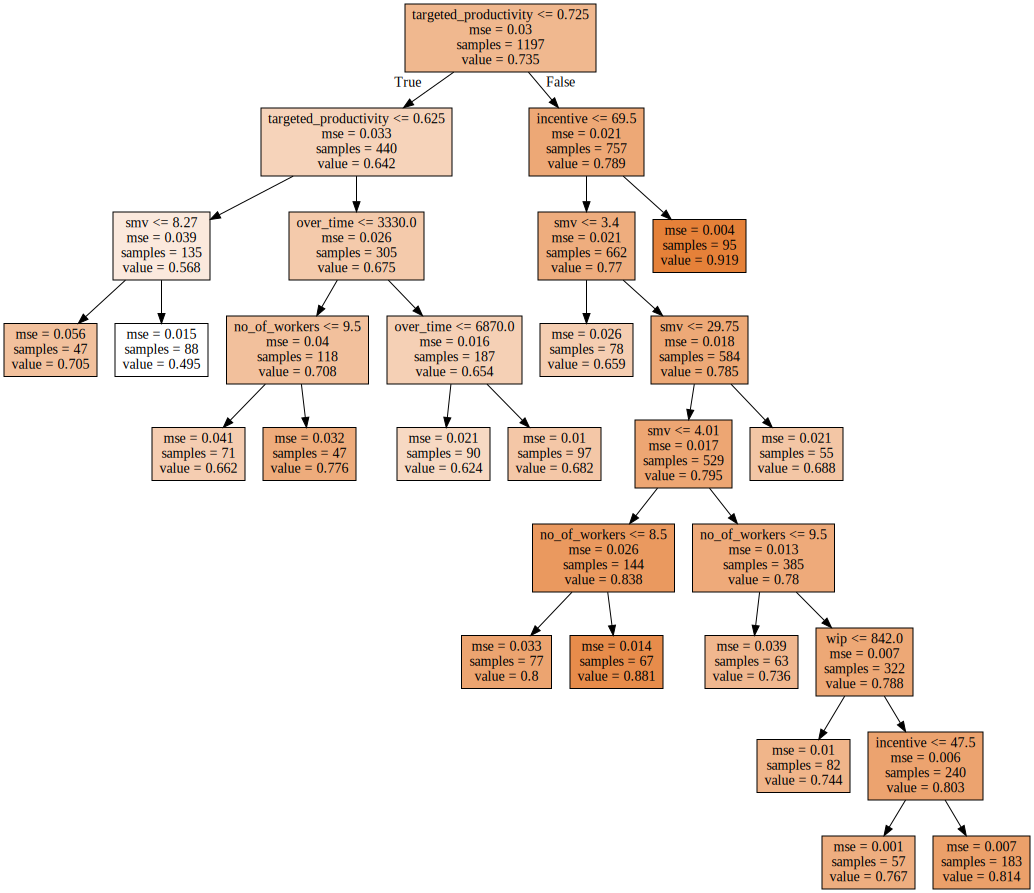

In [183]:
import os
import graphviz

os.environ["PATH"] += os.pathsep + '/Volumes/Macintosh HD - Data/opt/anaconda3/lib/python3.8/site-packages/sphinx/templates/graphviz'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree_reg_final, out_file=None, filled=True, feature_names=X.columns)

# Draw graph
graph = graphviz.Source(dot_data)

# Show graph
graph

# Predicting Target value

In [184]:
predicted_values = dtree_reg_final.predict(X_test)
predicted_values

array([0.66231431, 0.66231431, 0.66231431, 0.66231431, 0.70454231,
       0.70454231, 0.66231431, 0.66231431, 0.70454231, 0.70454231,
       0.70454231, 0.70454231, 0.70454231, 0.70454231, 0.70454231,
       0.66231431, 0.70454231, 0.70454231, 0.70454231, 0.70454231,
       0.70454231, 0.70454231, 0.70454231, 0.70454231, 0.70454231,
       0.66231431, 0.66231431, 0.66231431, 0.70454231, 0.70454231,
       0.66231431, 0.66231431, 0.66231431, 0.66231431, 0.66231431,
       0.66231431, 0.66231431, 0.70454231, 0.66231431, 0.66231431,
       0.70454231, 0.66231431, 0.66231431, 0.70454231, 0.70454231,
       0.66231431, 0.70454231, 0.66231431, 0.66231431, 0.70454231,
       0.66231431, 0.70454231, 0.66231431, 0.70454231, 0.70454231,
       0.70454231, 0.66231431, 0.70454231, 0.66231431, 0.70454231,
       0.66231431, 0.66231431, 0.66231431, 0.66231431, 0.70454231,
       0.70454231, 0.70454231, 0.70454231, 0.70454231, 0.70454231,
       0.70454231, 0.70454231, 0.70454231, 0.70454231, 0.70454

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

Brief Summary of the Project1 on regression Machine Learning : 
First of all, I have done an exploratory data analysis and initial cleansing of the data. parsing NAN into different features finally doing imputation across the features followed by the feature conversion to make the dataset all ready for the regression machine learning. I have included several machine learning regression models such as K neighbors Regressor, Linear Regression, Polynomial Regression, Ridge Regression, Lasso, Support Vector Machine Regressor bothsimple and with kernel trick ('linear', 'rbf' and 'poly'), Decision Tree Regressor. I have also utilized GridSearchCV() technique to find the best suited hyperparameter in each model and also computed cross validation score and r2 score over each and individual model to get a glimpse of how models are performing from one to another. By looking at the cross validation score and r2 score I am selecting my best final model. Finally, I am fine tuning my model with the best hyper paramter combination found through grid search technique and predicting the target value on the test dataset.